# Data Science Solutions for the Titanic Disaster

### This Notebook is intented to give simple and elaborate solutions,about data science projects from datasets provided by sites like Kaggle.

### The stages of working with data
-This particular competition from Kaggle is the entry-level competition to all the aspiring competitors that want to get to know Data Science and Machine Learning.Let's now go through the steps to solve this Data Science problem.
<br>

1. Question or problem definition.
<br>

2. Acquire training and testing data.
<br>
3. Observe,clean,preprocces the data.
<br>
4. Analyze,identify patterns and in general explore the data.
<br>
5. Model,predict with Machine Learning and solve the model.
<br>
6. Visualize ,report and present the problem solving stages and the final solution
<br>
7. Submit and present the results of our analysis

Now we will explore how we will work with the given datasets and explain which course of action we are going to follow to reach to the desired result and finally submit an adequate solution and machine learning model.

- We will start by getting to know our data better.See the info and description.
- Then we will start with the analyzation and the wrangling of the data.
- Then we will visualize the data.This might occur more than once in our effort to explain and deliver a rigid solution.
    
    
### Question and problem definition
This dataset is provided by Kaggle,and it's part of the Titanic disaster competition.This problem will try to answer the question of who is more likely to survive the titanic disaster judging from a certain set of data that are unique to each passenger.

<br>
We may also want to develop some early understanding aobut the domain of our problem.This is described on the Kaggle competition description page.
<br>

__Link:https://www.kaggle.com/competitions/titanic/overview__    

* On April 15, 1912 during her maiden voyage,the Titanic sank after colliding with an iceberg,killing 1502 out of 2224 passengers and crew.Translated 32% survival rate.

<br>

* One of the reasons that the shipwreck led to  such loss of life was that there were not enough lifeboats on board for the passengers and crew,and in part due to the faulty design of the shp's bulkheads

<br>

* Although there was some element of luck involved in surviving the sinking,some groups of people were more likely to survive than others,such as women ,children,and the wealthy upper-class on board the ship.


### Let's now explore the data and begin to approach the problem.



In [333]:
#Importing the libraries that we think we are going to use 
    
   #data analysis and manipulating data

import numpy as np
import pandas as pd
import random as rnd
    
    #visualization
    
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

## __Acquire data__

The python pandas library packages help us work with our datasets.We will start by acquiring the training and test datasets into Pandas dataframes.We will also combine the datasets to run some operations on these two datasets.

In [4]:
train_set=pd.read_csv('C:\\Users\\Kostas\\Documents\\Data Science Project Data\\Titanic Survival Data\\train.csv')
test_set=pd.read_csv('C:\\Users\\Kostas\\Documents\\Data Science Project Data\\Titanic Survival Data\\test.csv')

### Analyze by describing the data

The Pandas Python library also helps us describe and get a first analytical look on the data that we will be working on and help use answer following questions early in our project

__Which features are available in the dataset??__

We are gonna anwer this question below.

In [7]:
#The columns of the dataset that we are working with 

for category in train_set.columns:
    print(category,'\n')

PassengerId 

Survived 

Pclass 

Name 

Sex 

Age 

SibSp 

Parch 

Ticket 

Fare 

Cabin 

Embarked 



__These are the different columns in the dataframe that we are going to work with.__

<br>
<br>

#### Which features are categorical in the dataframe??
These values classify the samples into sets of similar samples.Within categorical  features are the values nominal,ordinal,ratio,or interval based??Among other things this helps us select the appropriate plots for visualization later

* Categorical:Survived,Sex,Embarked,Ticket


#### Which features are numerical???
Which features are numericall?These values change from sample to sample.Within numerical features are the values discrete,continuous,or timeseries bases(timestamp)??Among other things this helps us select the appropriate plots for the visualization later.

* Continuous:Age,Fare/Discrete:SibSp,Parch.

In [8]:
#Let's now preview the data

train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Which features are mixed data types??__
<br>

Numerical,alphanumeric data within same feature.These are candidates for correcting goal.
What do we mean by correcting is that when we deploy our machine learning models,these columns that contain these data are the features that will be introduced to our model.
But our model needs to train on numerical data,such as integers,so if a column contains strings as the data we need to somehow convert these strings to integers that convey information about the data that they describe.
<br>

* __Example:Column='Gender',we could replace 'Male' with 1 and 'Female' with 0.__
<br>

__Which features may contain errors or typos??__
<br>

This is harder to review for a very large dataset,however reviewing a few samples from a smaller dataset just tell us outright ,which features may require correcting or special handling.
<br>

* __Name feature may contain errors or typos as there are several ways used to describe a name including titles,round brackets,and quotes used for alternative or short names.__

In [90]:
#Let's now see the last part of the dataframe

train_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


__Now let's see which features contain blank,null or empty values??__
<br>

This will for sure require correcting
<br>

* Cabin>Age>Embarked features contain a number of null values in that order for the training dataset
<br>

* Cabin>Age are incomplete in case of the test dataset
<br>

__What are the date types for various features?__
<br>

Helping us during converting them later.
<br>

* Seven features(columns) are integer or floats.Six in case of test dataset.
<br>

* Five features are strings (object type of data).

In [92]:
#Let's now see the information for the datasets(train and test)

train_set.info()
print('-'*45)
test_set.info()
                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

__What is the distribution of numerical feature values across the samples?__
<br>

This helps us judge,among other early insights,how representative is the training dataset of the actual problem domain.
<br>

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.
   

In [93]:
#Now let's describe our dataset to understand the above bullet points.

train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__What is the distribution of the categorical features?__

* Names are unique across the dataset(count=unique=891)

* Sex variable is a categorical column and has two possible values with 65% male

* Cabin values have several duplicates across samples.Alternatively several passengers shared the same cabin.

* Embarked takes three possible values.S port used by most passengers(top=S)

* Ticket feature has high ration (22%) of duplicate values(unique=681)

In [95]:
#Now let's describe the categorical columns of the dataframe

train_set.describe(include=['O']) #Include O is a pandas way to describe the 
                                  #categorical columns.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Assumptions based on data analysis
<br>

We come to the point that we are following assumptions based on data analysis done so far.We may validate these assumptions by manipulating the data and maybe creating new dataframes based on the questions that we need to answer,and validate these assumptions before we take any further action.
<br>

__Correlating__
<br>

We want to know how well does each feature correlate with Survival.We want to tackle this problem early in our project in order to be able to make certain steps towards solving the problem.

<br>

__Completing__
<br>

1.We may want to complete Age feature  as it is definitely correlated to survival(In these dire situations generally the women and children are evactuated first from a sinking ship).
<br>

2.We may want to complete the Embarked feature as it may also correlate with the survival rate or another important feature.

<br>
3.Plus we want to compare the Sex feature with the survival rate for the same reason we want to correlate the survival with the Age feature(Women's and children's evacuation and safety is prioritized.)
<br>

__Creating__
<br>

1.We may want to create a new feature called Family  based on Parch and SibSp to get total count of family members on board.
<br>

2.We amy want to engineer the Name feature to extract Title as a new feature.
<br>

3.We may want to create new feature for Age bands.This turns a continuous numerical feaature into an ordinal categorical feature.
<br>

4.We may also want to create a Fare range feature if it helps our analysis.
<br>

__Classifying__
<br>

We may also add to our assumptions based on the problem description noted earlier.
<br>

1.Women are more likely to survive(Sex=Female)
<br>

2.Children (age<x) were more likely to survive.
<br>

3.The upper-class passengers (Pclass=1) were more likely to have survived.
<br>

## Analyze by pivoting the tables.
<br>

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.
<br>


* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [113]:
#Let's now see the percentage of people that have survived per class.

train_set[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


__So what the above code tells us is that the higher percentage of the passengers per class that had the biggest chance of surviving were the passengers of the first class.__

In [117]:
#Let's now examine what happens between the two sexes on board.Which one had the
#biggest chance of surviving??

train_set[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


__The above code validates the starting assumption that the vast majority of the survivors of the Titanic disastere were indeed women with indeed a huge gap from the men.(74% of women survived and only 18% of men).__

In [124]:
#Let's now see how the survival rate correlates with the number of family member
#someone had on board.)

print(train_set[['SibSp','Survived']].groupby(['SibSp']).count())
print('-'*18)
print(train_set[['SibSp','Survived']].groupby(['SibSp']).mean())

       Survived
SibSp          
0           608
1           209
2            28
3            16
4            18
5             5
8             7
------------------
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


__So the above codes shows clearly that the higher the amount of family someone had on board the higher the chance he wouldn't survive the disaster.And maybe there is a logical explanation behing that.Someone with a family onboard might care for their family members and would try to save them first,thus putting himself in a difficult situation by not managing to save himself.__

In [127]:
#Let's now see how does the age correlate with the survival rete

train_set[['Parch','Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


__This produced dataframe does not show any correlation between the survival rate and the number of parents and children someone had on board so we might want to engineer this feature later to actually derive some conclusion.__

## Analyze by visualizing the data

<br>

Now after the first analysis that we made we will continue by using some python libraries to visualize our conclusions and make someone that does not know how to code acquainted with the results.
<br>

We will use charts to analyze continuous numerical variables like Age where banding or ranges will help indentify useful patters in the data.The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands.This helps us answer questions relating to specific bands(Did infants have better survival rate?)
<br>

__Observations.__
<br>

* Infants(Age<=4) had high chance of survival
* Oldest passengers(Age=80) survived
* Large number of 15-25 year olds did not survive
* Most passengers are in the 15-35 range of Age

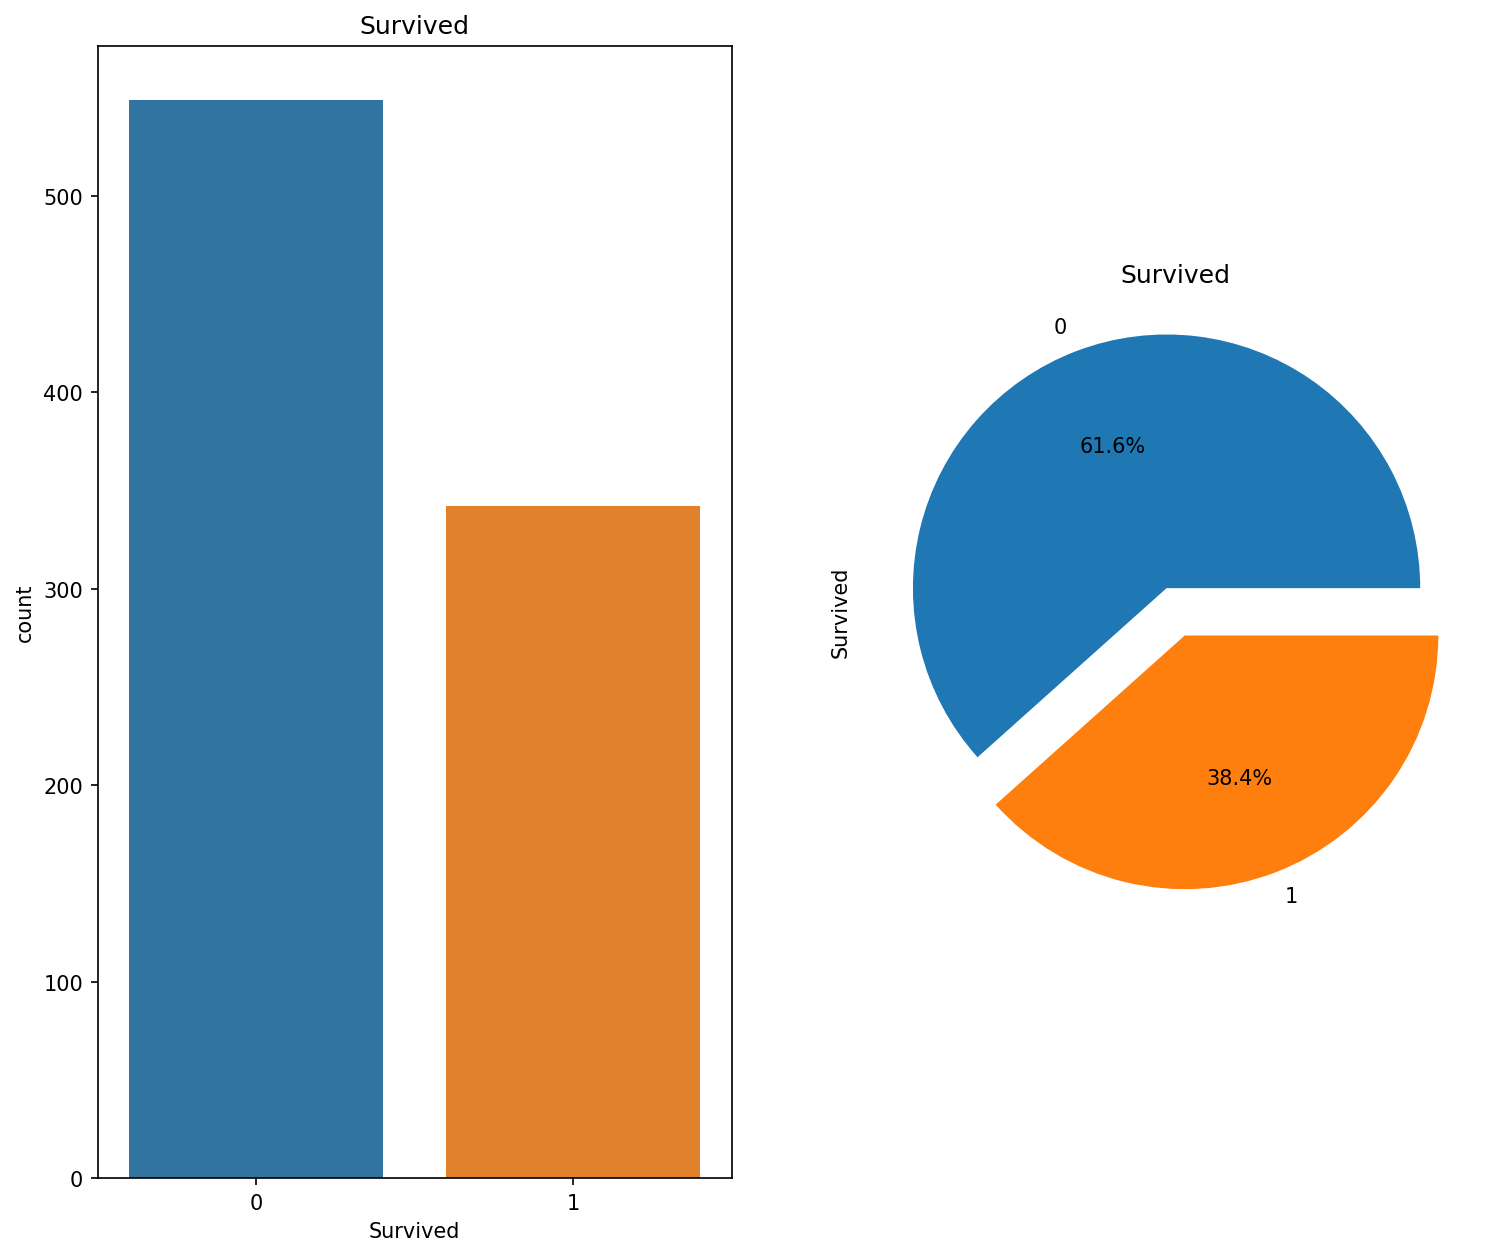

In [148]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,10),dpi=150)

sns.countplot(data=train_set,x='Survived',ax=axes[0])
train_set['Survived'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',ax=axes[1])
axes[0].set_title('Survived')
axes[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.
<br>

Let's now explore how is survival rate fares when it comes to tha age of the passengers.


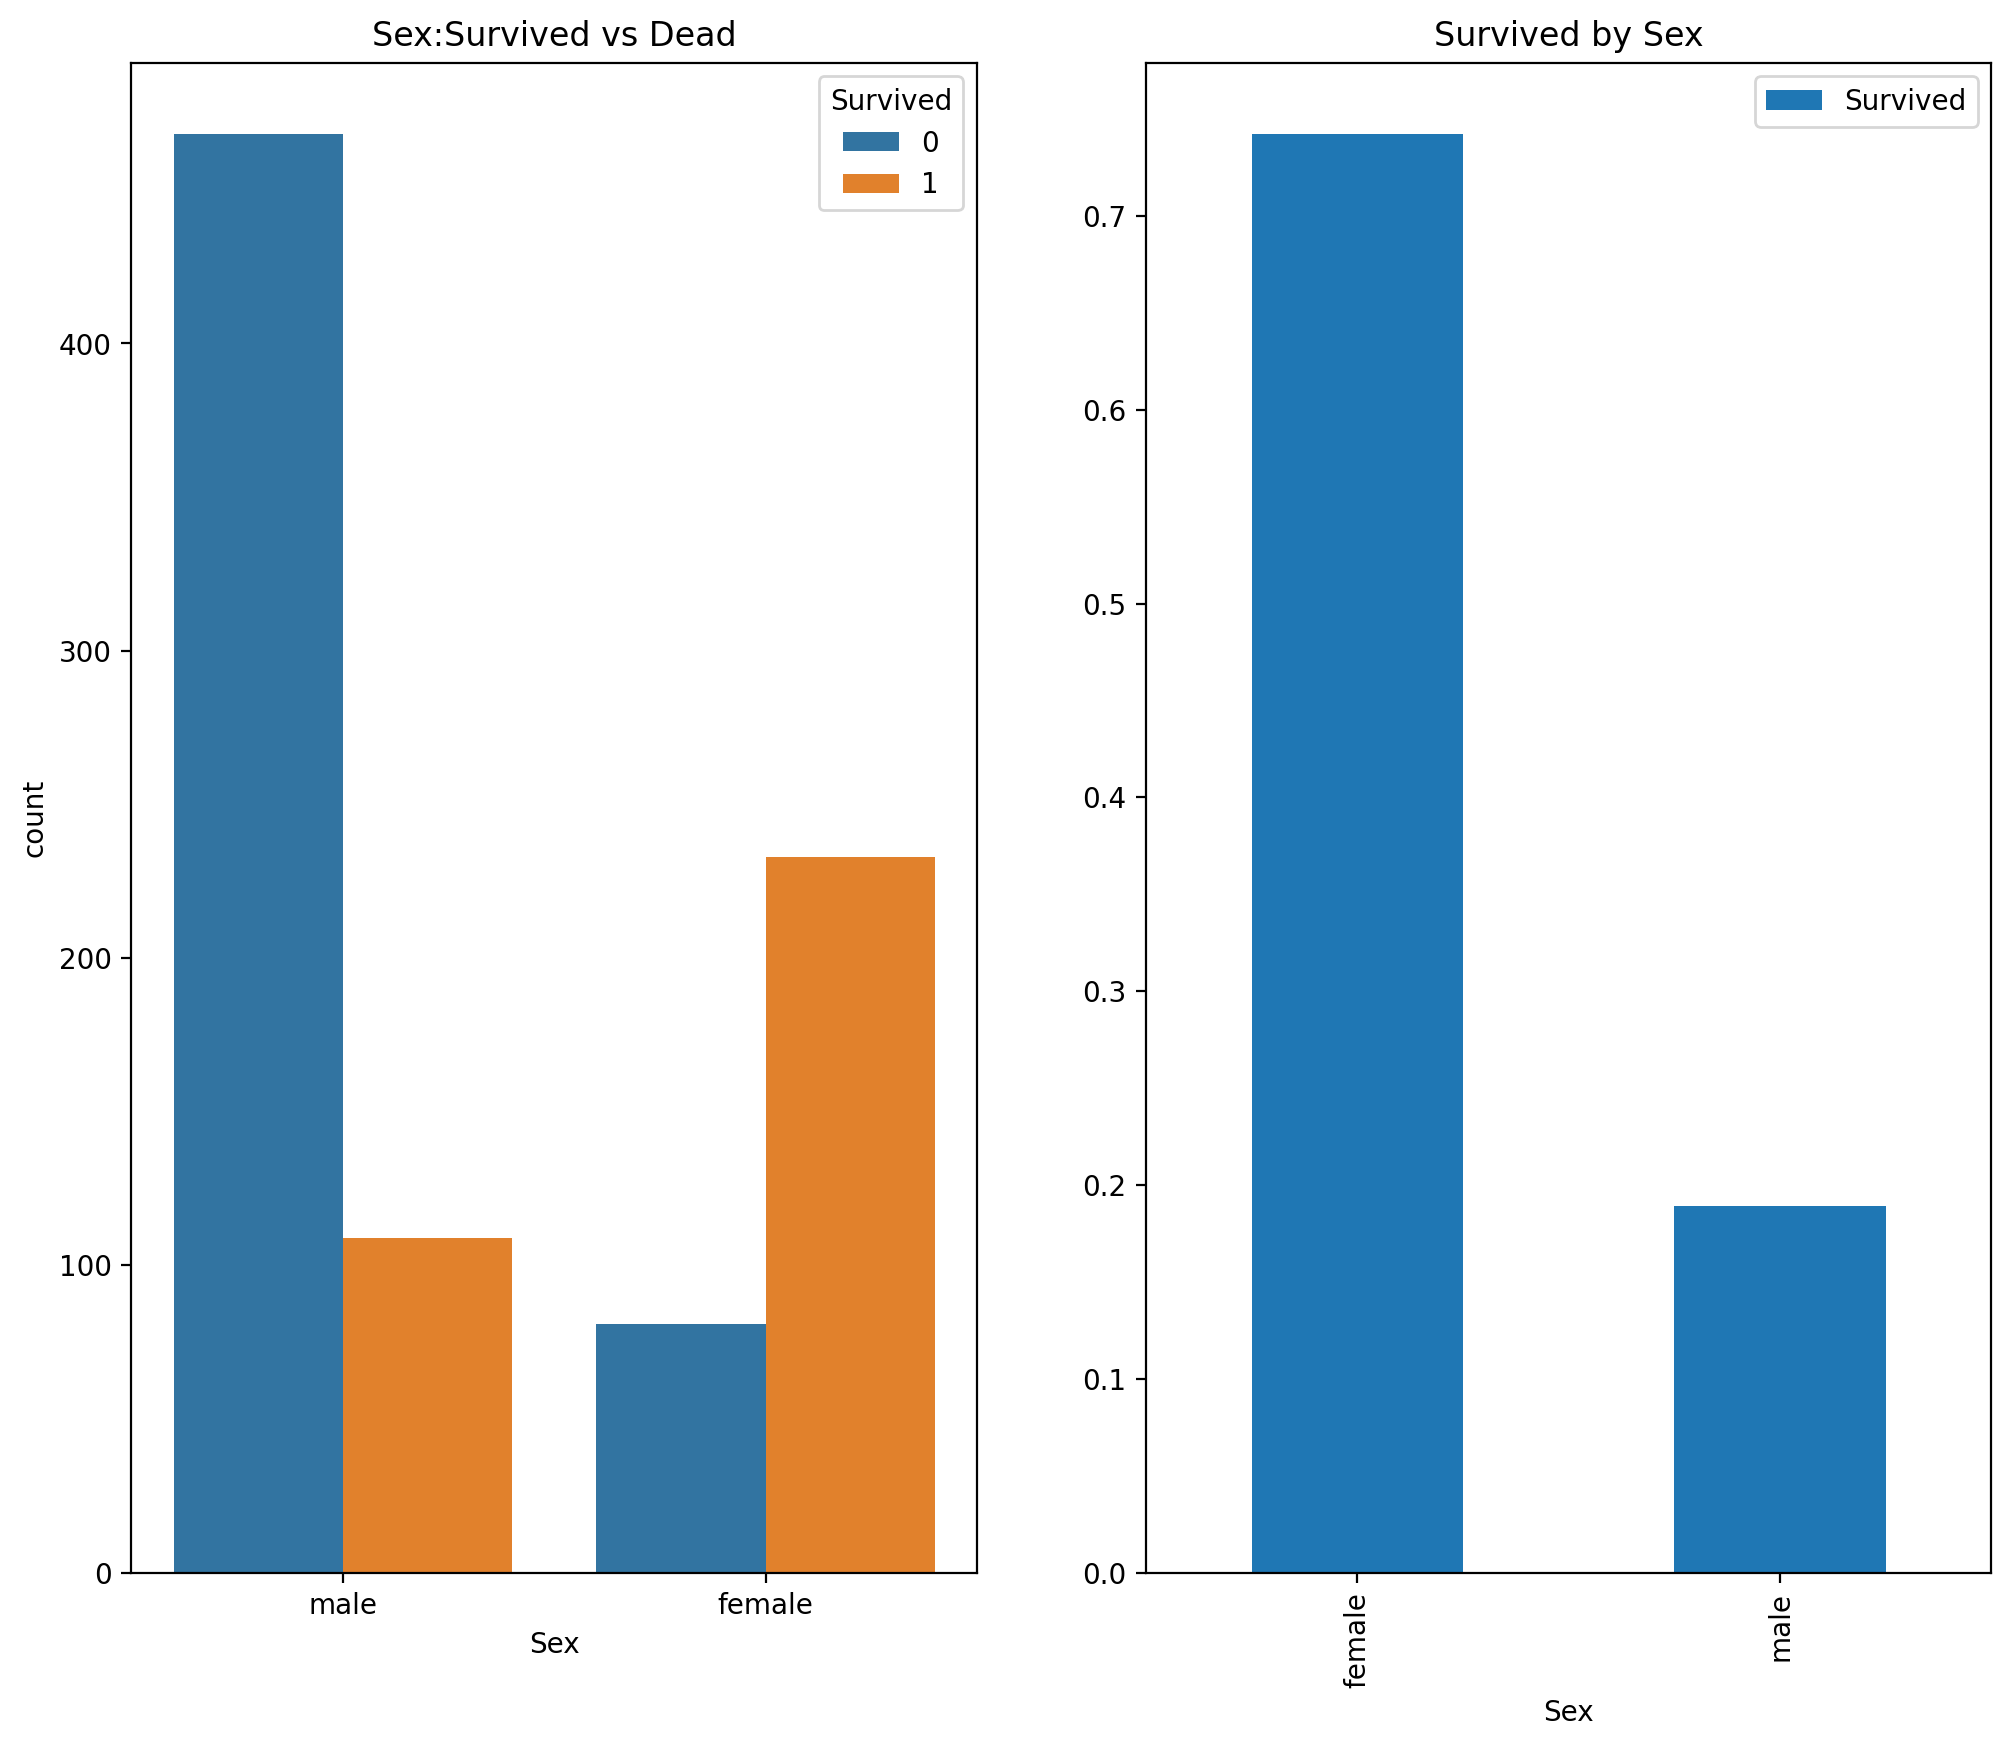

In [153]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,10),dpi=200)

sns.countplot(data=train_set,x='Sex',hue='Survived',ax=axes[0])
train_set[['Survived','Sex']].groupby(['Sex']).mean().plot.bar(ax=axes[1])
axes[0].set_title('Sex:Survived vs Dead')
axes[1].set_title('Survived by Sex')
plt.show()

This looks interesting.The number of men onboard is a lot more that that of women.Still the number of women surviving the disaster is almost twice the number of males saved.__The survival rates for a woman on the ship is around 75% while  that for men is around 18-19%.__

<br>

This looks to be a very important feature for modeling later.But is it the best??Let's check some other features.

### Let's now explore the classes of the ship.
<br>

So does it matter in which class of the ship you were in to judge whether or not you would have survived the disaster??
<br>

Let's explore how important is the class and how does it impact the survivability rate.

In [157]:
pd.crosstab(train_set.Pclass,train_set.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


__We are starting to see some patterns emerging from the data showing us that  the passengers in the first class of the ship had a bigger chance of surviving but let's visualize this data to get a better understanding.__

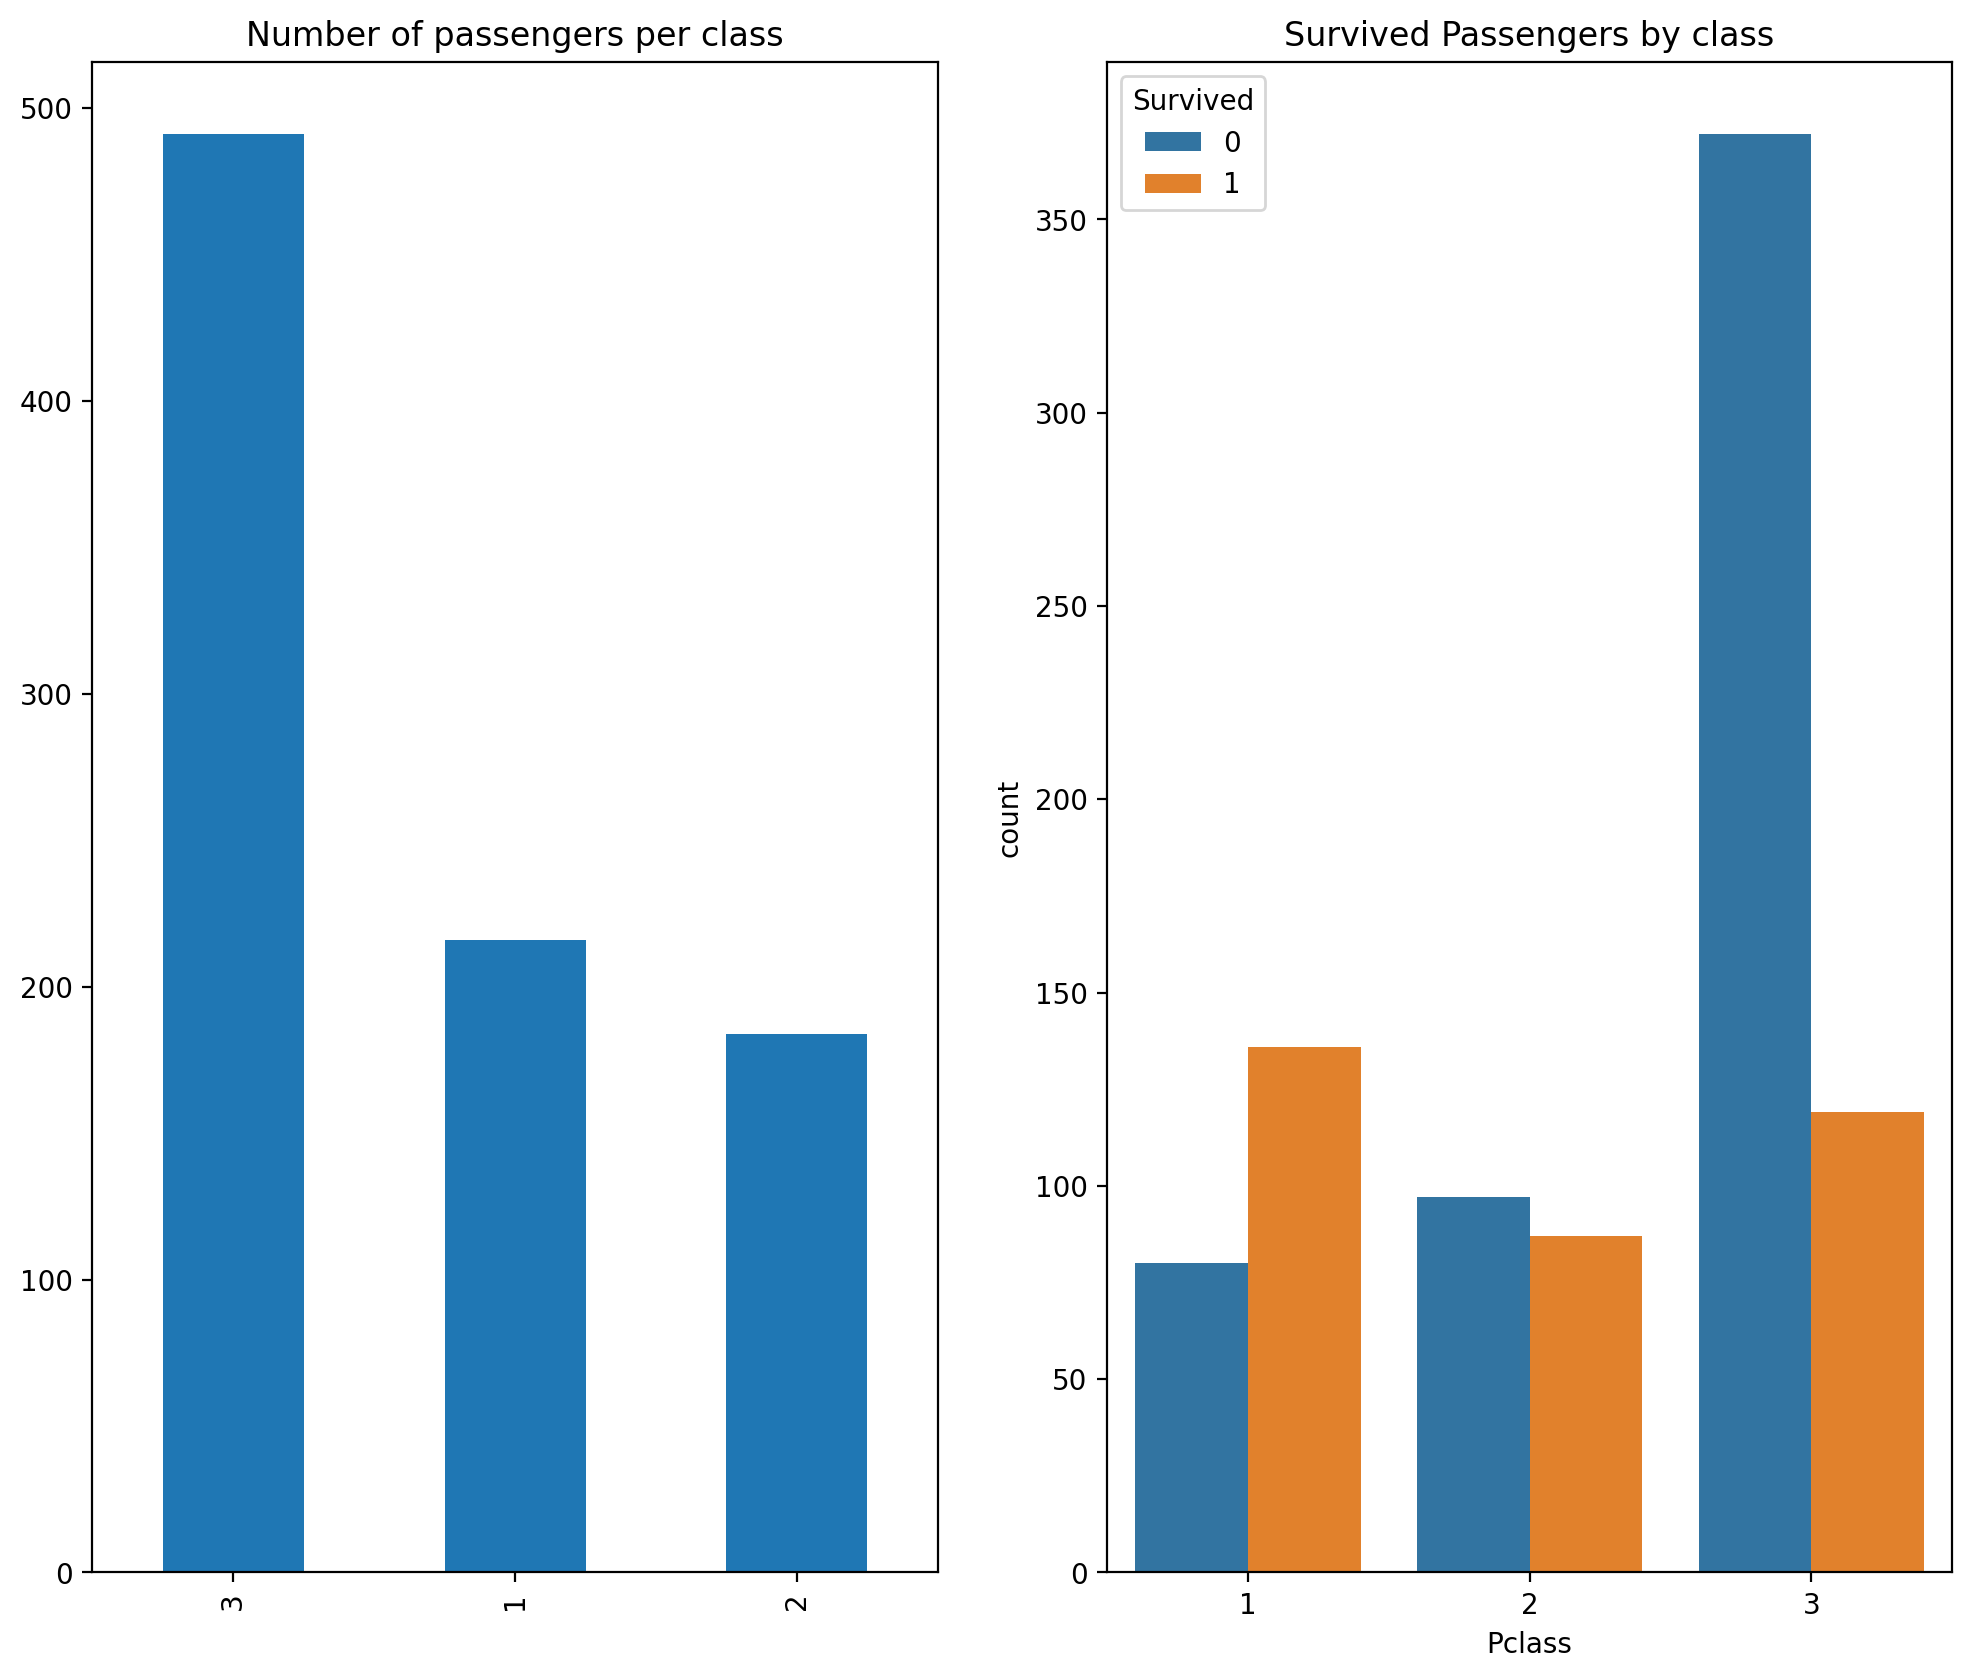

In [167]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,10),dpi=200)

train_set['Pclass'].value_counts().plot.bar(ax=ax[0])
sns.countplot(data=train_set,x='Pclass',hue='Survived')
ax[1].set_title('Survived Passengers by class')
ax[0].set_title('Number of passengers per class')
plt.show()

Some may say that __Money can't buy Everything__.But we can clearly see that the Passengers of Pclass 1 were given a very high priority while rescue.Even though the number of Passengers in Pclass 3 were a lot higher,still the nubmer of survival from them is very low ,somewhere around __25%__.

<br>

For Pclass 1 the percentage of the passengers that survived is around 63% while for Pclass 2 it falls to around 48%.So money and status matters.Such a materialistic world we live in.
<br>

Let's dive in a little bit deeper and check other features along with class and maybe we will find other more interesting observations.Let's check the survival rate with Sex and Pclass together.



In [174]:
pd.crosstab([train_set.Sex,train_set.Survived],train_set.Pclass,margins=True).style.background_gradient(cmap='summer_r')

__If we look closely on the crosstab above we are going to see that the passengers on the 3rd class of the ship suffered the biggest loses of life of all the passengers onboard the Titanic.__

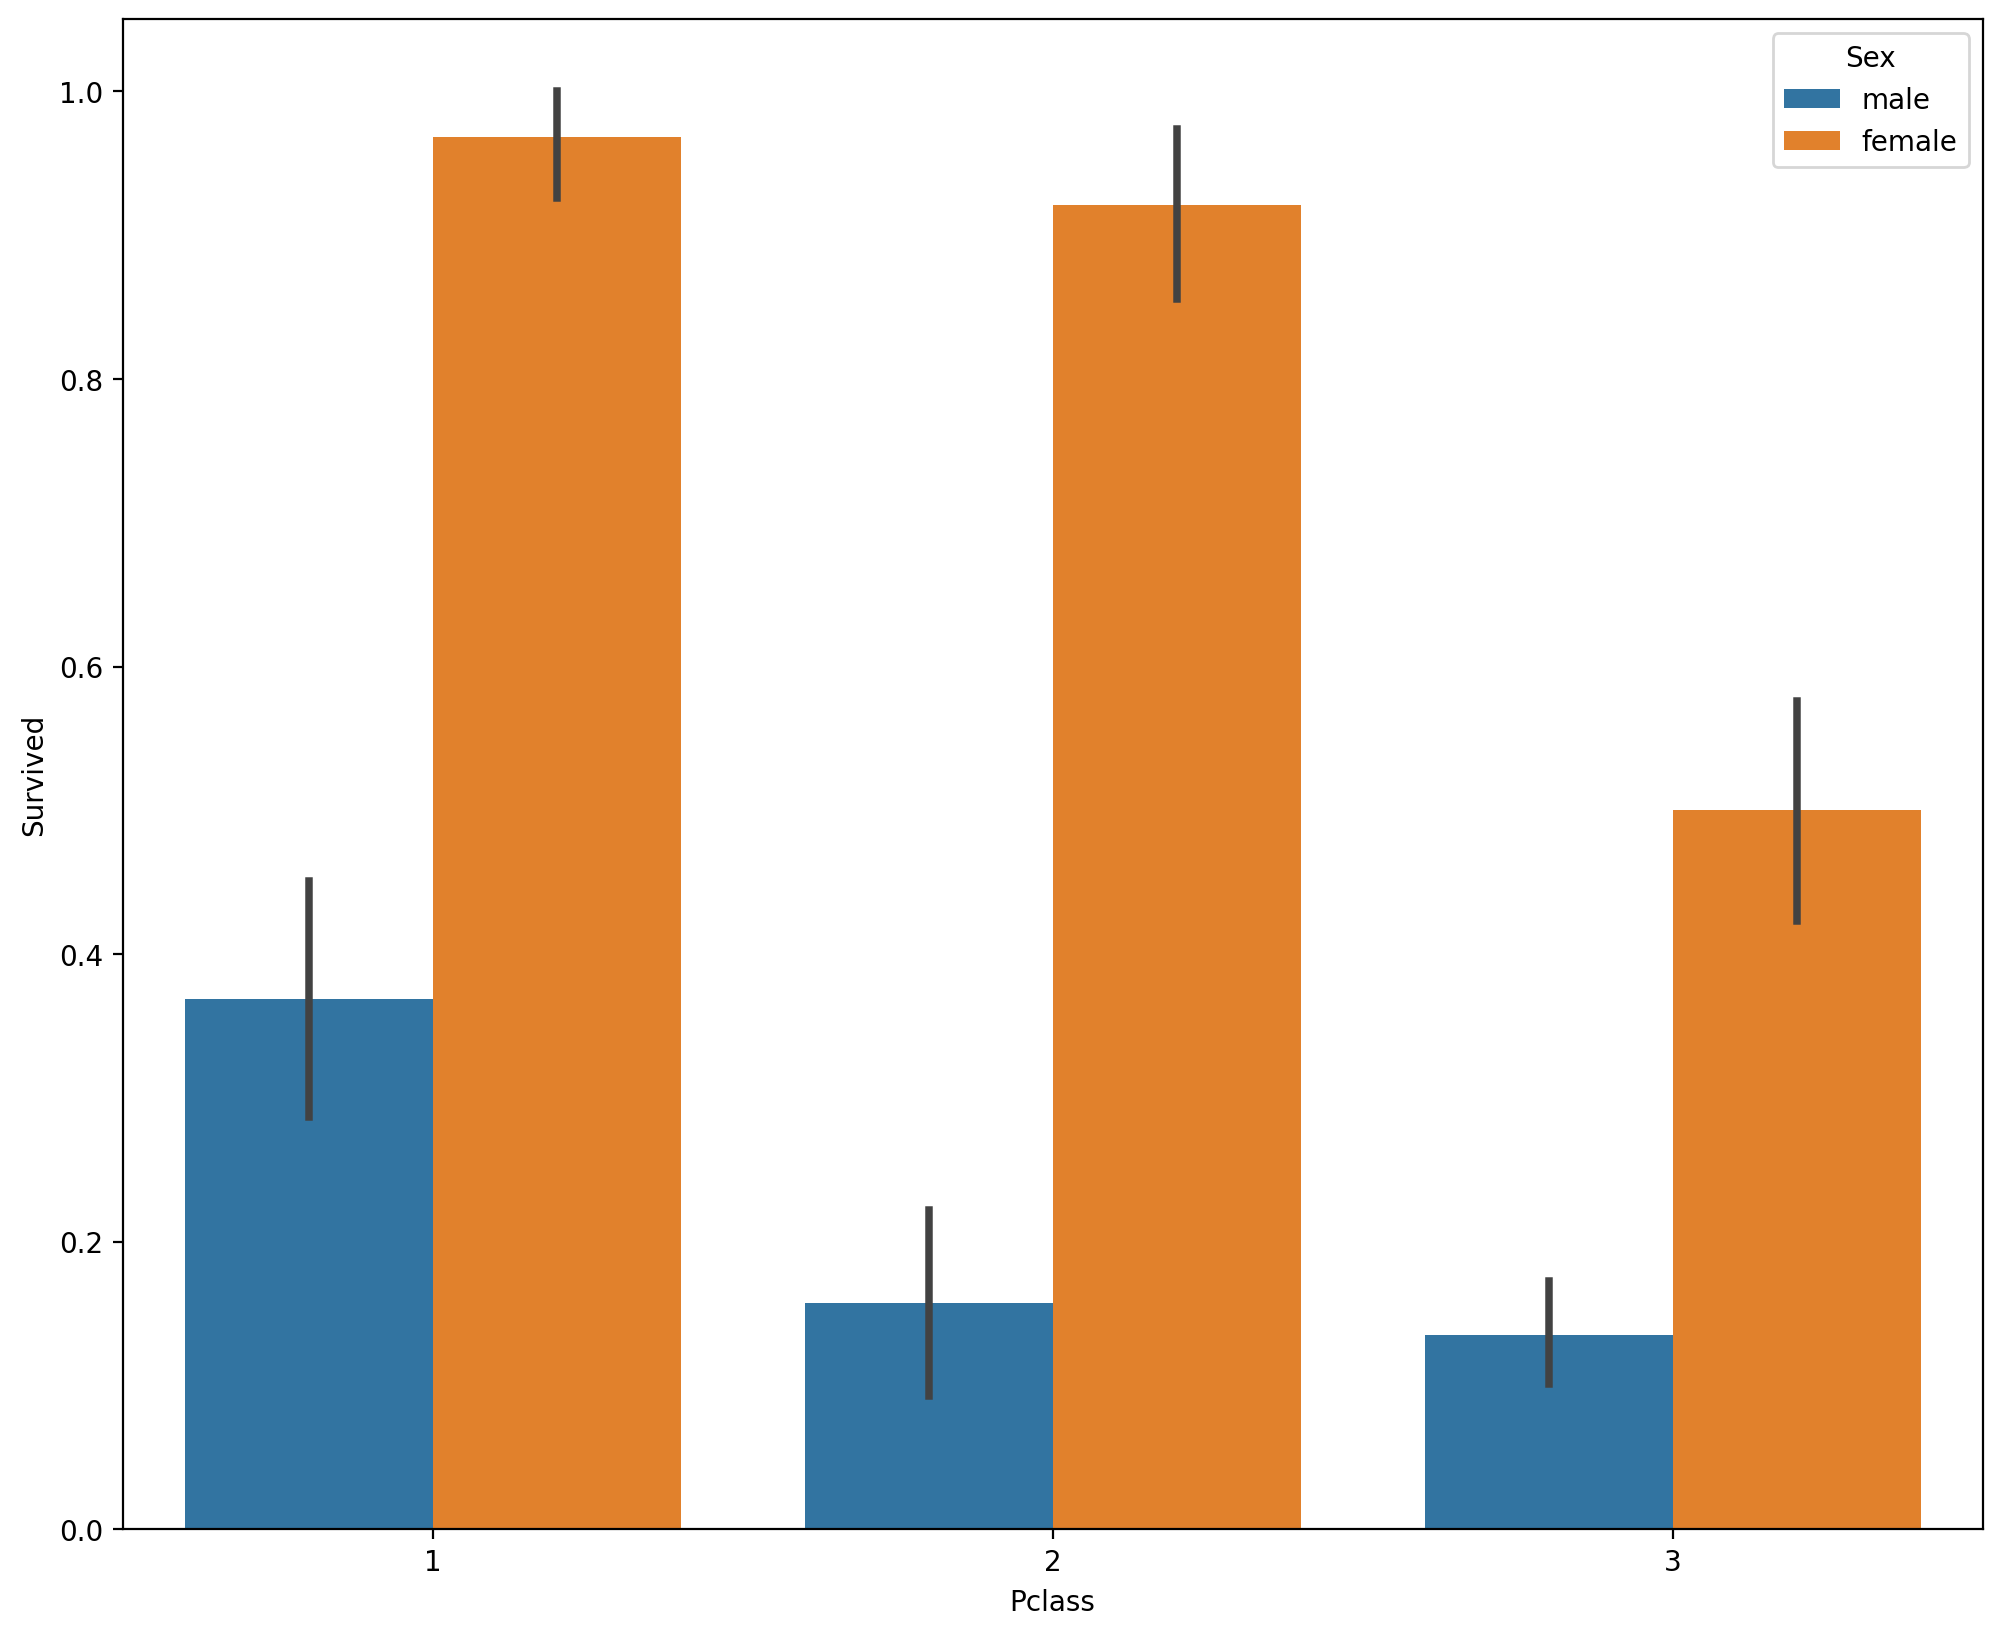

In [186]:
fig=plt.figure(figsize=(12,10),dpi=200)

sns.barplot(data=train_set,x='Pclass',y='Survived',hue='Sex')
plt.show()

Looking at the crosstab and then on the barplot above we can see clearly that the survival rate for Women from Pclass 1 is about 95-96%,as only 3 out of 94 women from Pclass 1 died in the disaster.

It is evident that irrespective of Plcass,Women were given first priority while the rescue was ensuing.Even Men from Pclass1 have a very low survival rate.
<br>

Looks like Plcass is also an important feature.Let's analyze other features.
<br>

## Age

In [191]:
print('The Oldest Passenger in the ship was of :',train_set['Age'].max(),'years')
print('The Youngest Passenger in the ship was of :',train_set['Age'].min(),'years')
print('The average Age of the passengers of the ship was of :',round(train_set['Age'].mean(),2),'years')

The Oldest Passenger in the ship was of : 80.0 years
The Youngest Passenger in the ship was of : 0.42 years
The average Age of the passengers of the ship was of : 29.7 years


__Let's now discover the distribution of the ages of the passengers onboard the Titanic.__

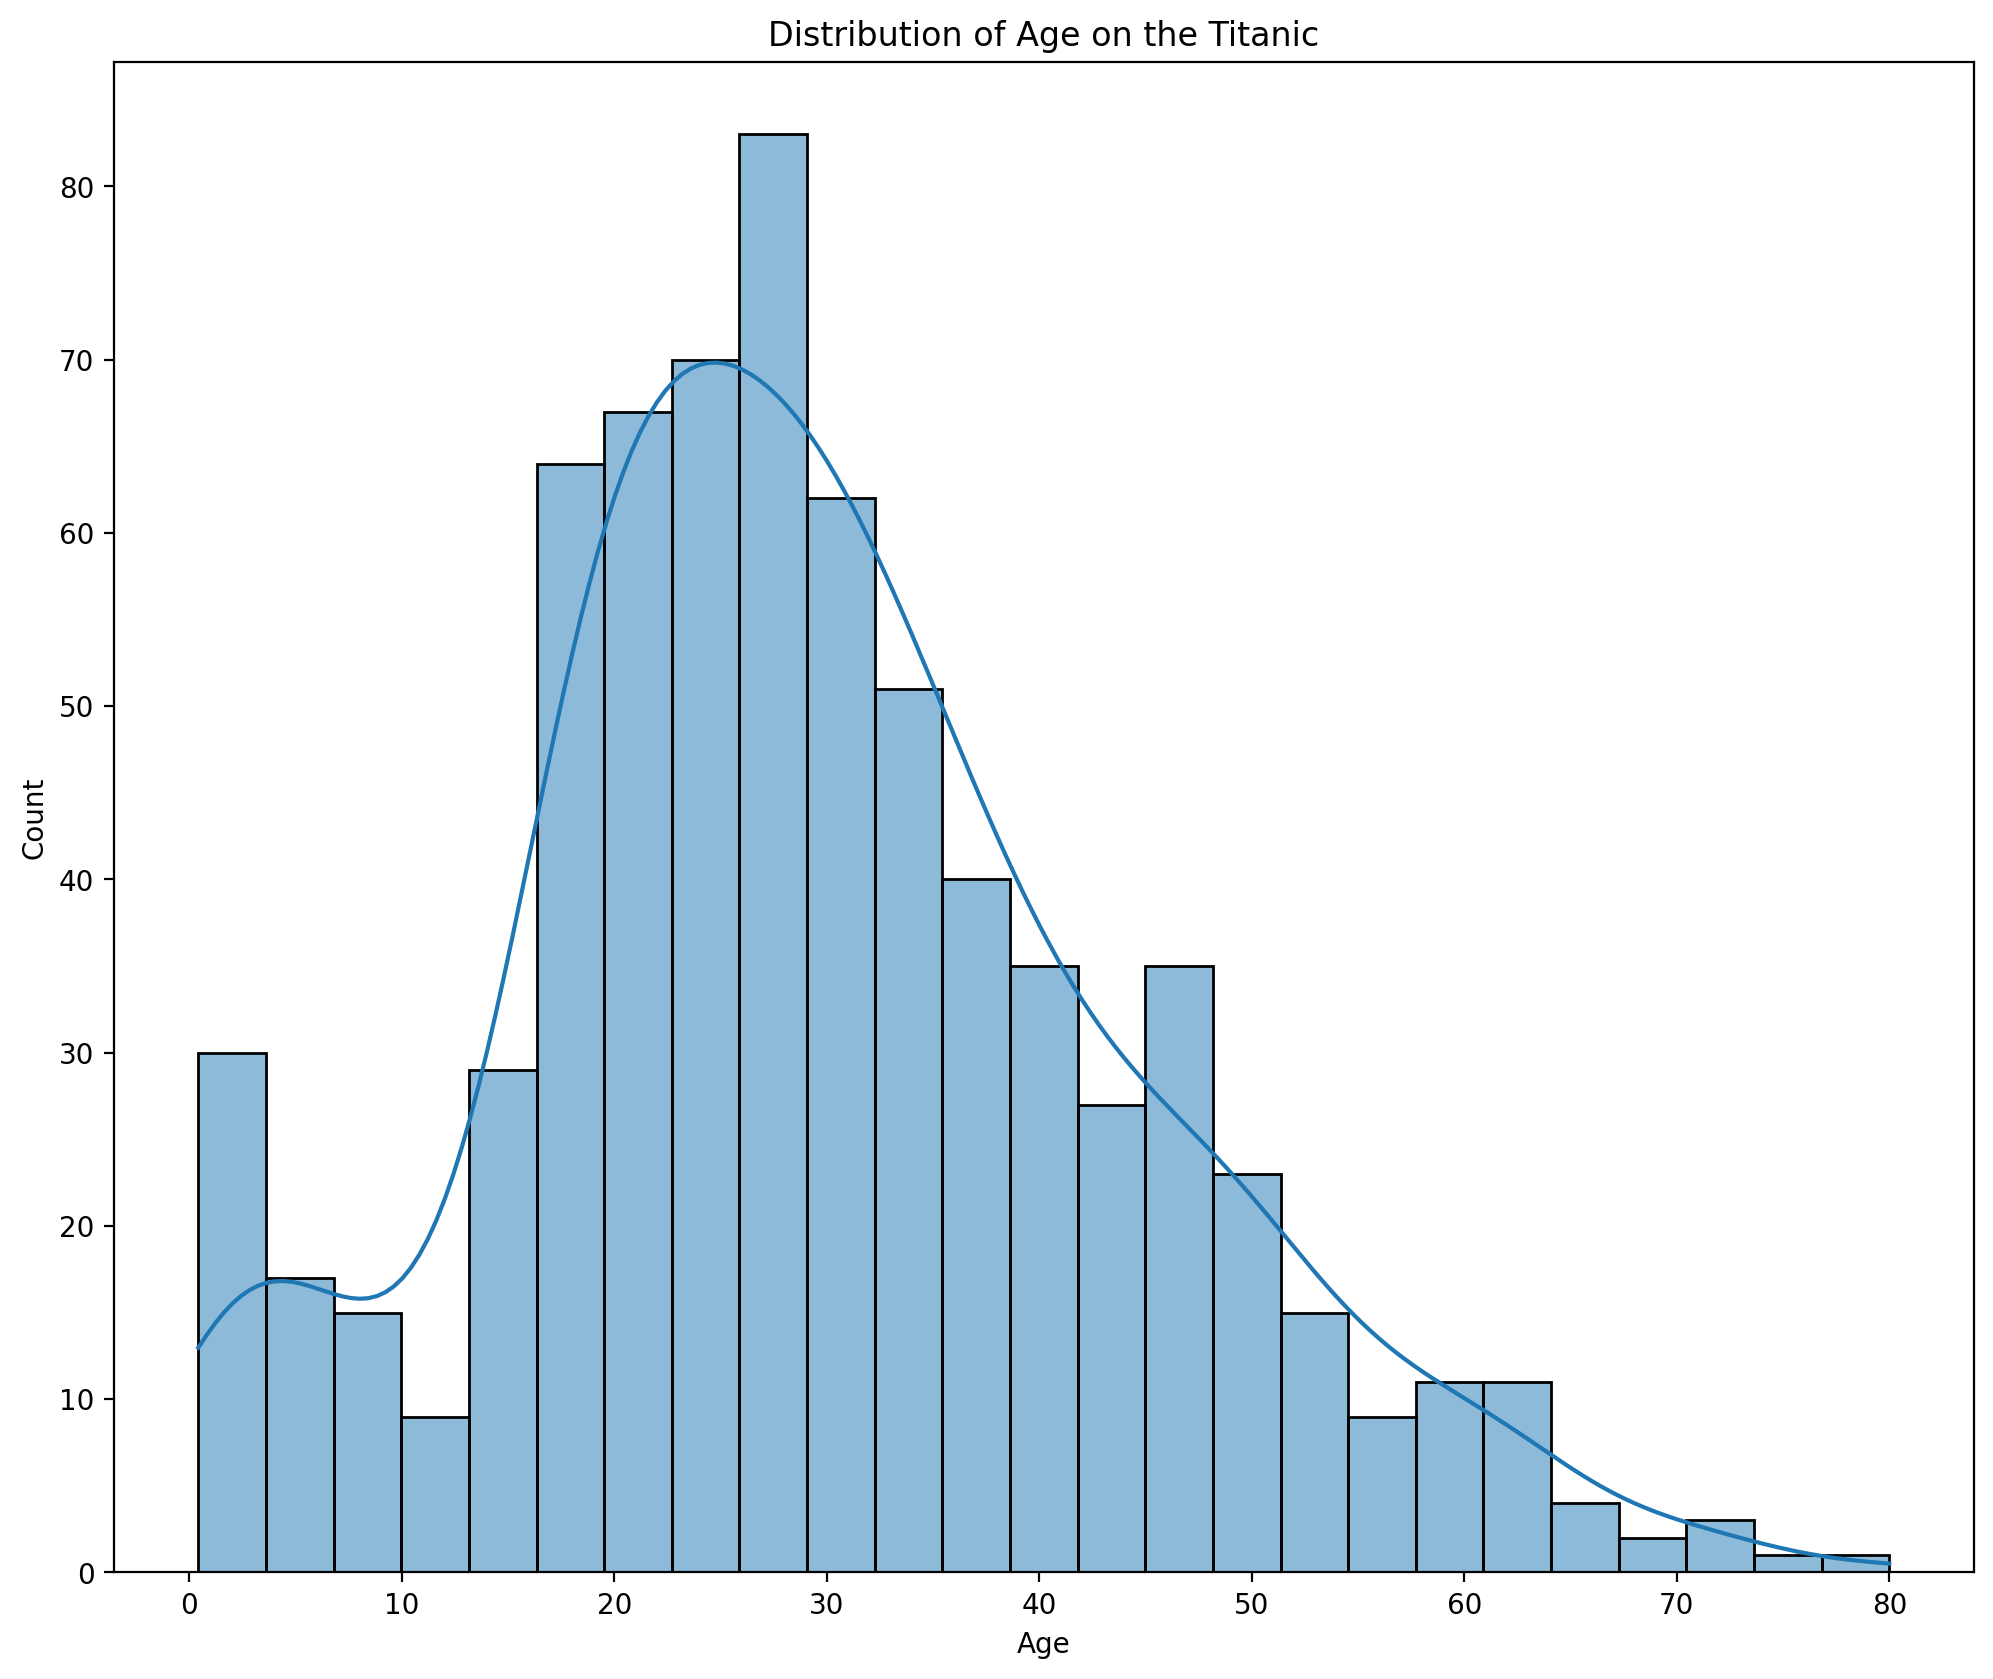

In [204]:
fig=plt.figure(figsize=(12,10),dpi=200)

sns.histplot(data=train_set,x='Age',kde=True,bins=25).set_title('Distribution of Age on the Titanic')

plt.show()

We can see that more passengers are between the age of 15-40 years of age on the ship and as we can see from the above plot there is a significant amount of kids on the ship __(Age<=10)__

<br>

__Now let's try to combine features such as Pclass and Sex with the feature of Age to see if we can extract some conclusions to use afterwards.__

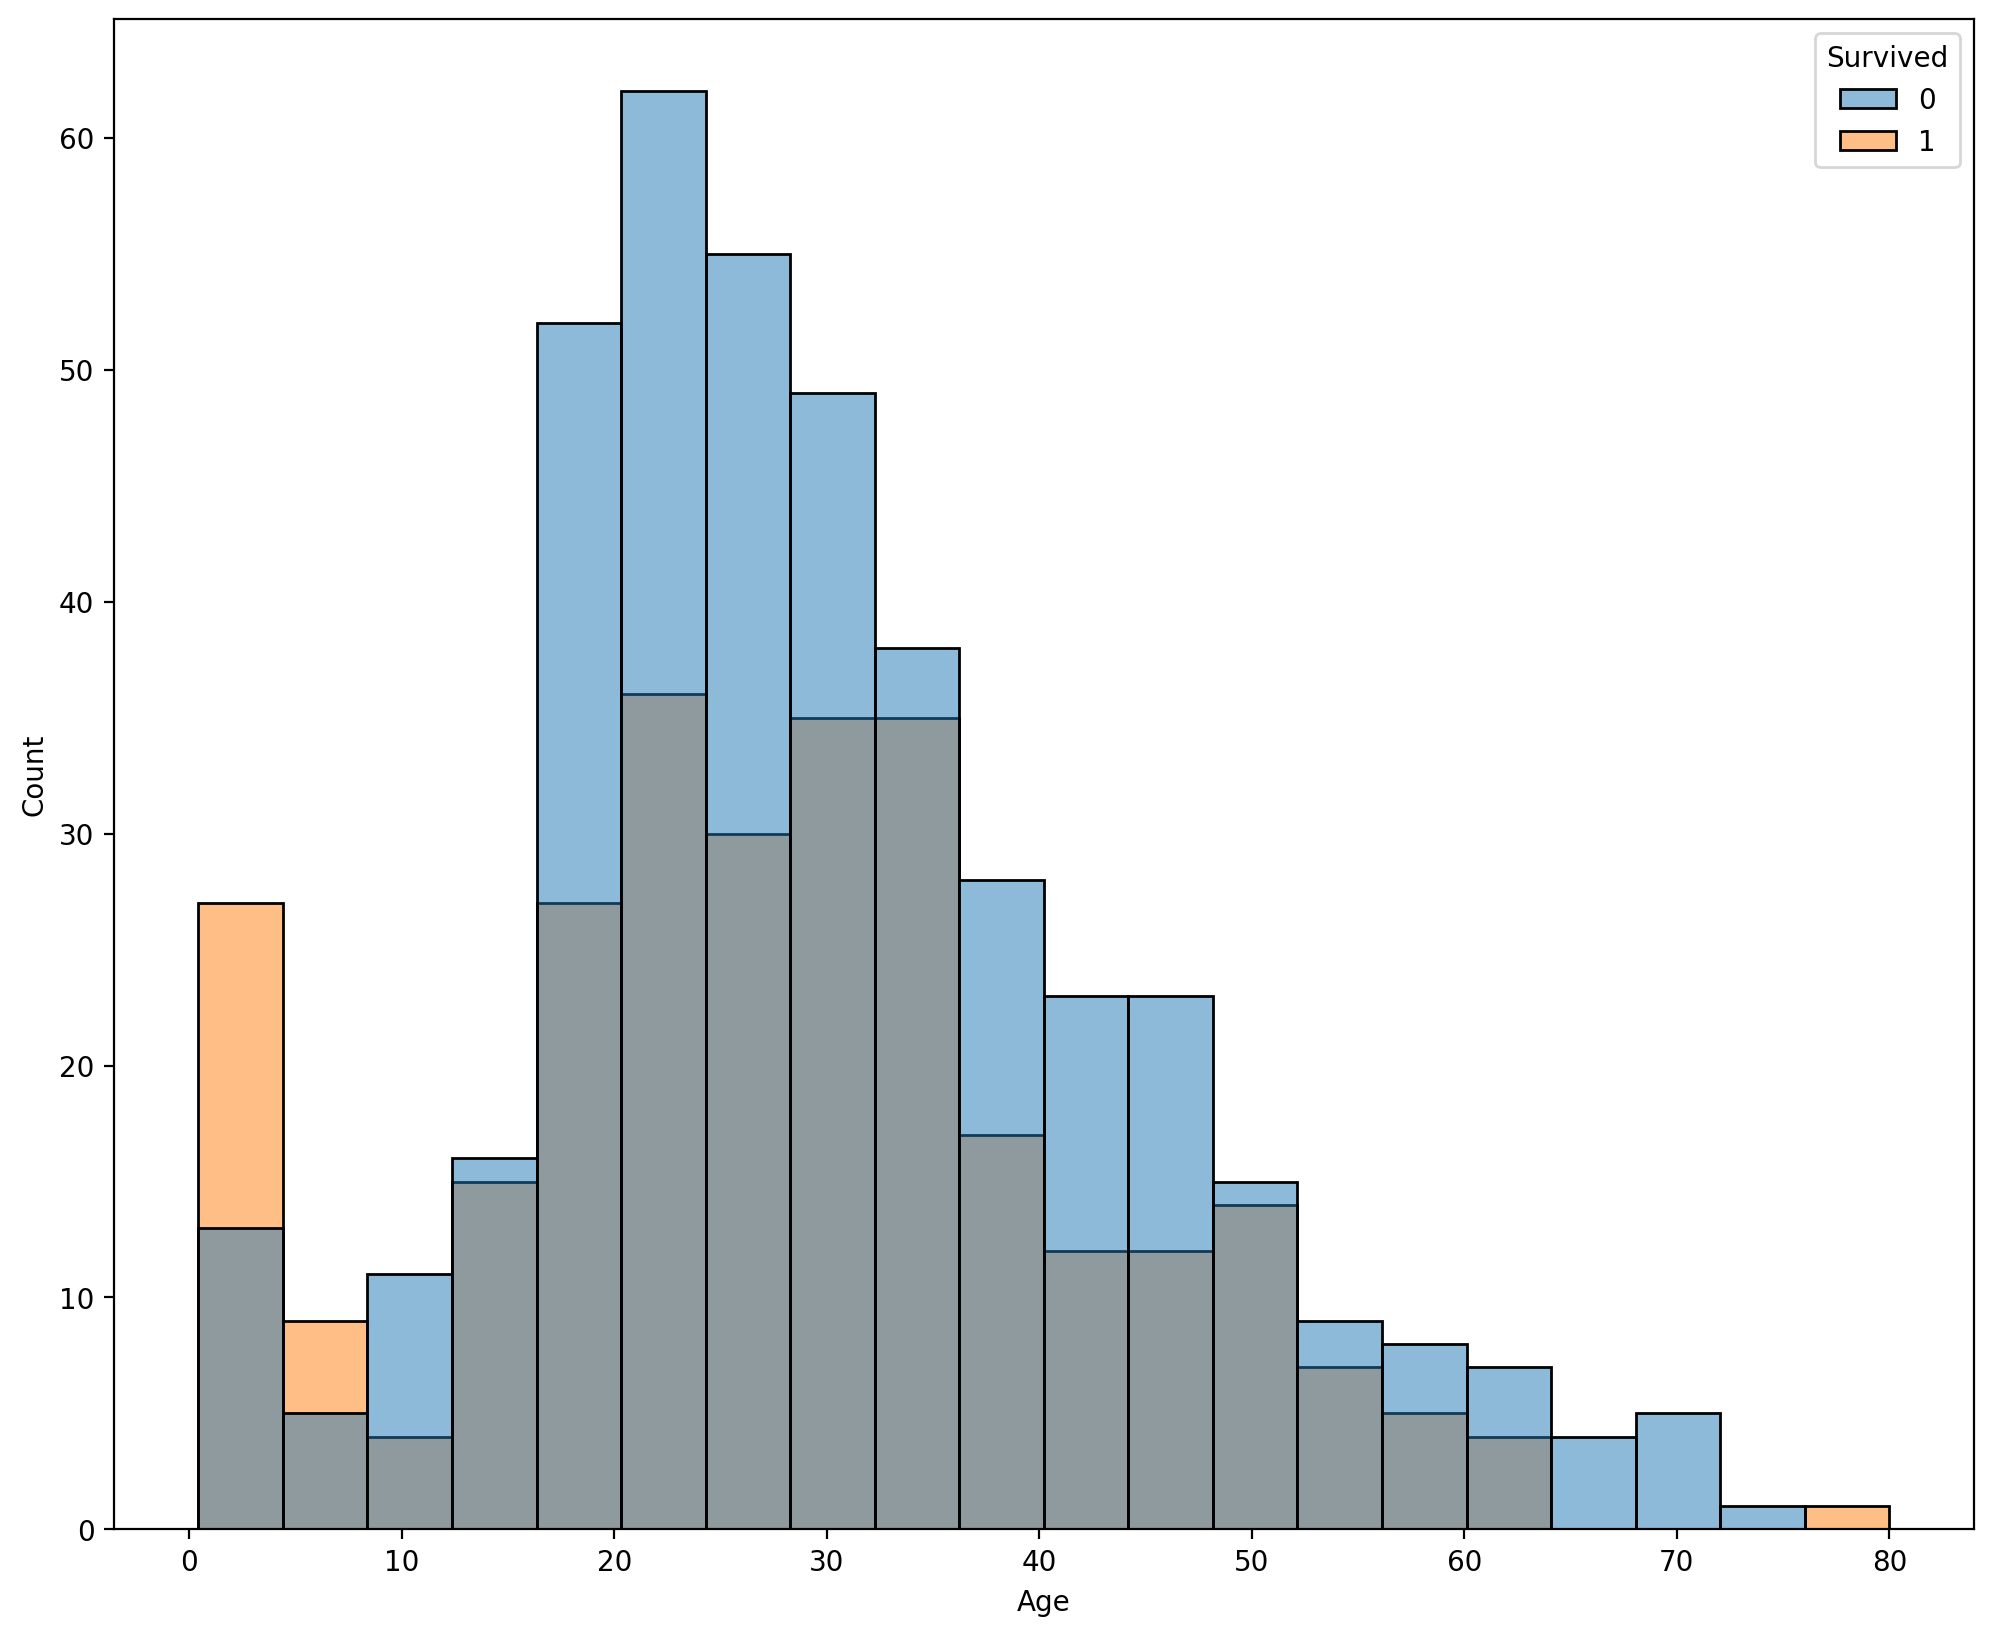

In [210]:
fig=plt.figure(figsize=(12,10),dpi=200)

sns.histplot(data=train_set,x='Age',hue='Survived')
plt.show()

Here we can see that a big part of the passengers of the ship that were between the ages of 15-40 died in the disaster,and amazingly we can see that the passengers with age below 10 years of age were given big priority when the rescue took place.
<br>

Another clue that comes up from this plot is that the very old passengers that were very close to the age of 80 were saved too.

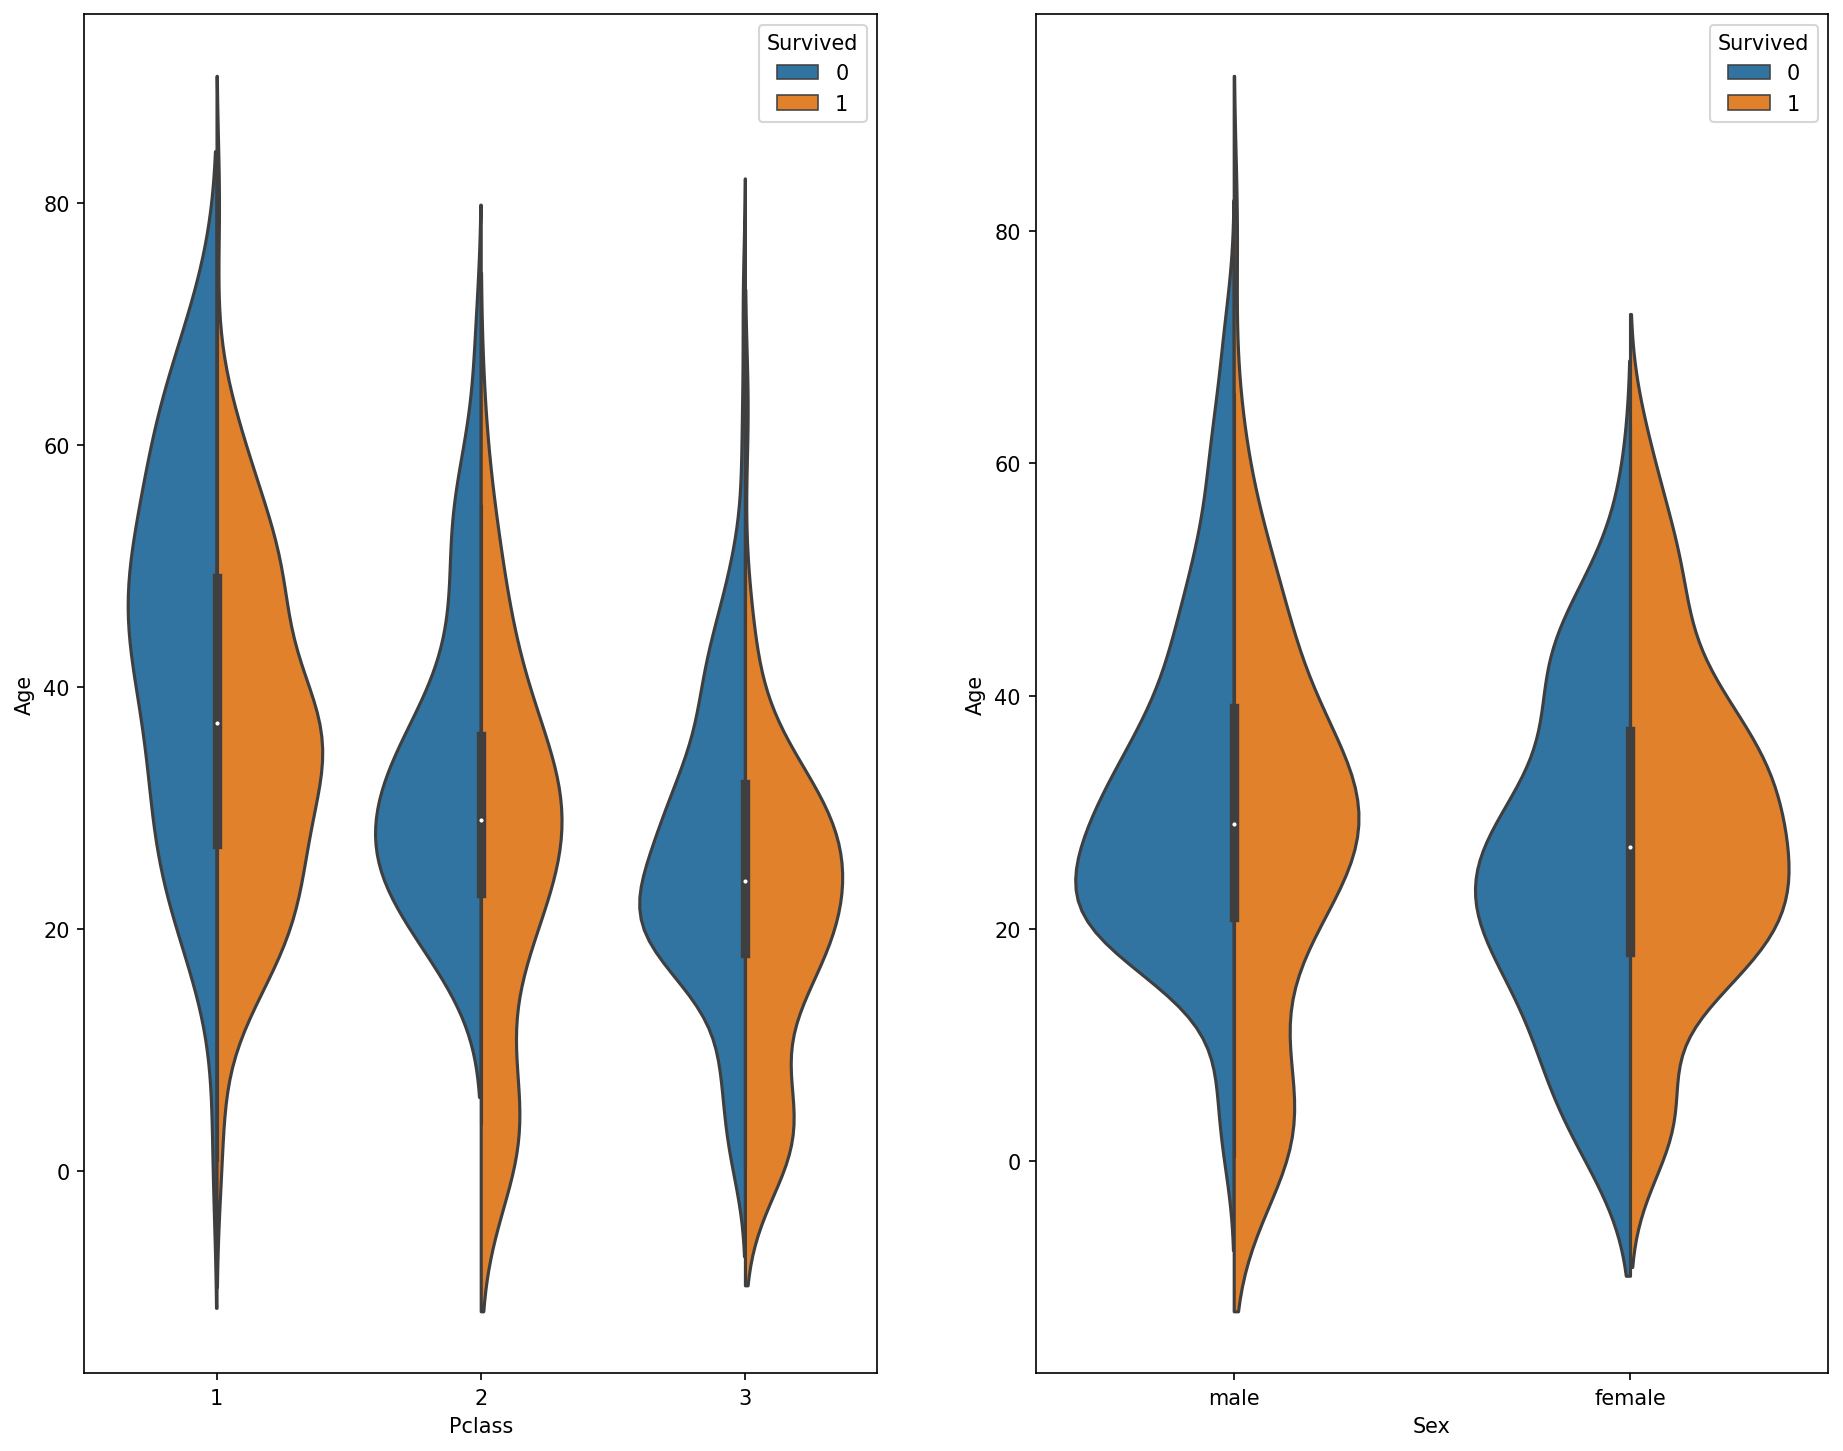

In [236]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,12),dpi=150)

sns.violinplot(data=train_set,x='Pclass',y='Age',hue='Survived',ax=axes[0],split=True)
sns.violinplot(data=train_set,x='Sex',y='Age',hue='Survived',ax=axes[1],split=True)
plt.show()

__Observations__
<br>

1)The number of children increases with Plcass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass
<br>

2)Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women

<br>

3)For males,the survival chances decrease with an increase in Age.

<br>

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

To do that, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups,and not assign the mean average of the age to a kid or an infant.

In [240]:
#Let's create a new column in our train_set dataframe

train_set['Initial']=0
for name in train_set:
    train_set['Initial']=train_set.Name.str.extract('([A-Za-z]+)\.')

Okay so here we are using the Regex: [A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [244]:
pd.crosstab(train_set.Initial,train_set.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. We will replace them with Miss and same thing for other values.

In [246]:
train_set['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [253]:
train_set.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

__Filling NaN Ages__

In [254]:
#Assgning the NaN values with the above Ages that correspond to every salutation.
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Mr'),'Age']=33
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Mrs'),'Age']=36
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Master'),'Age']=5
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Miss'),'Age']=22
train_set.loc[(train_set.Age.isnull())&(train_set.Initial=='Other'),'Age']=46

In [255]:
#Now let's see how many null values we have,we should have 0 null values.

train_set['Age'].isnull().sum()

#So indeed we engineered this feature to have zero null values.

0

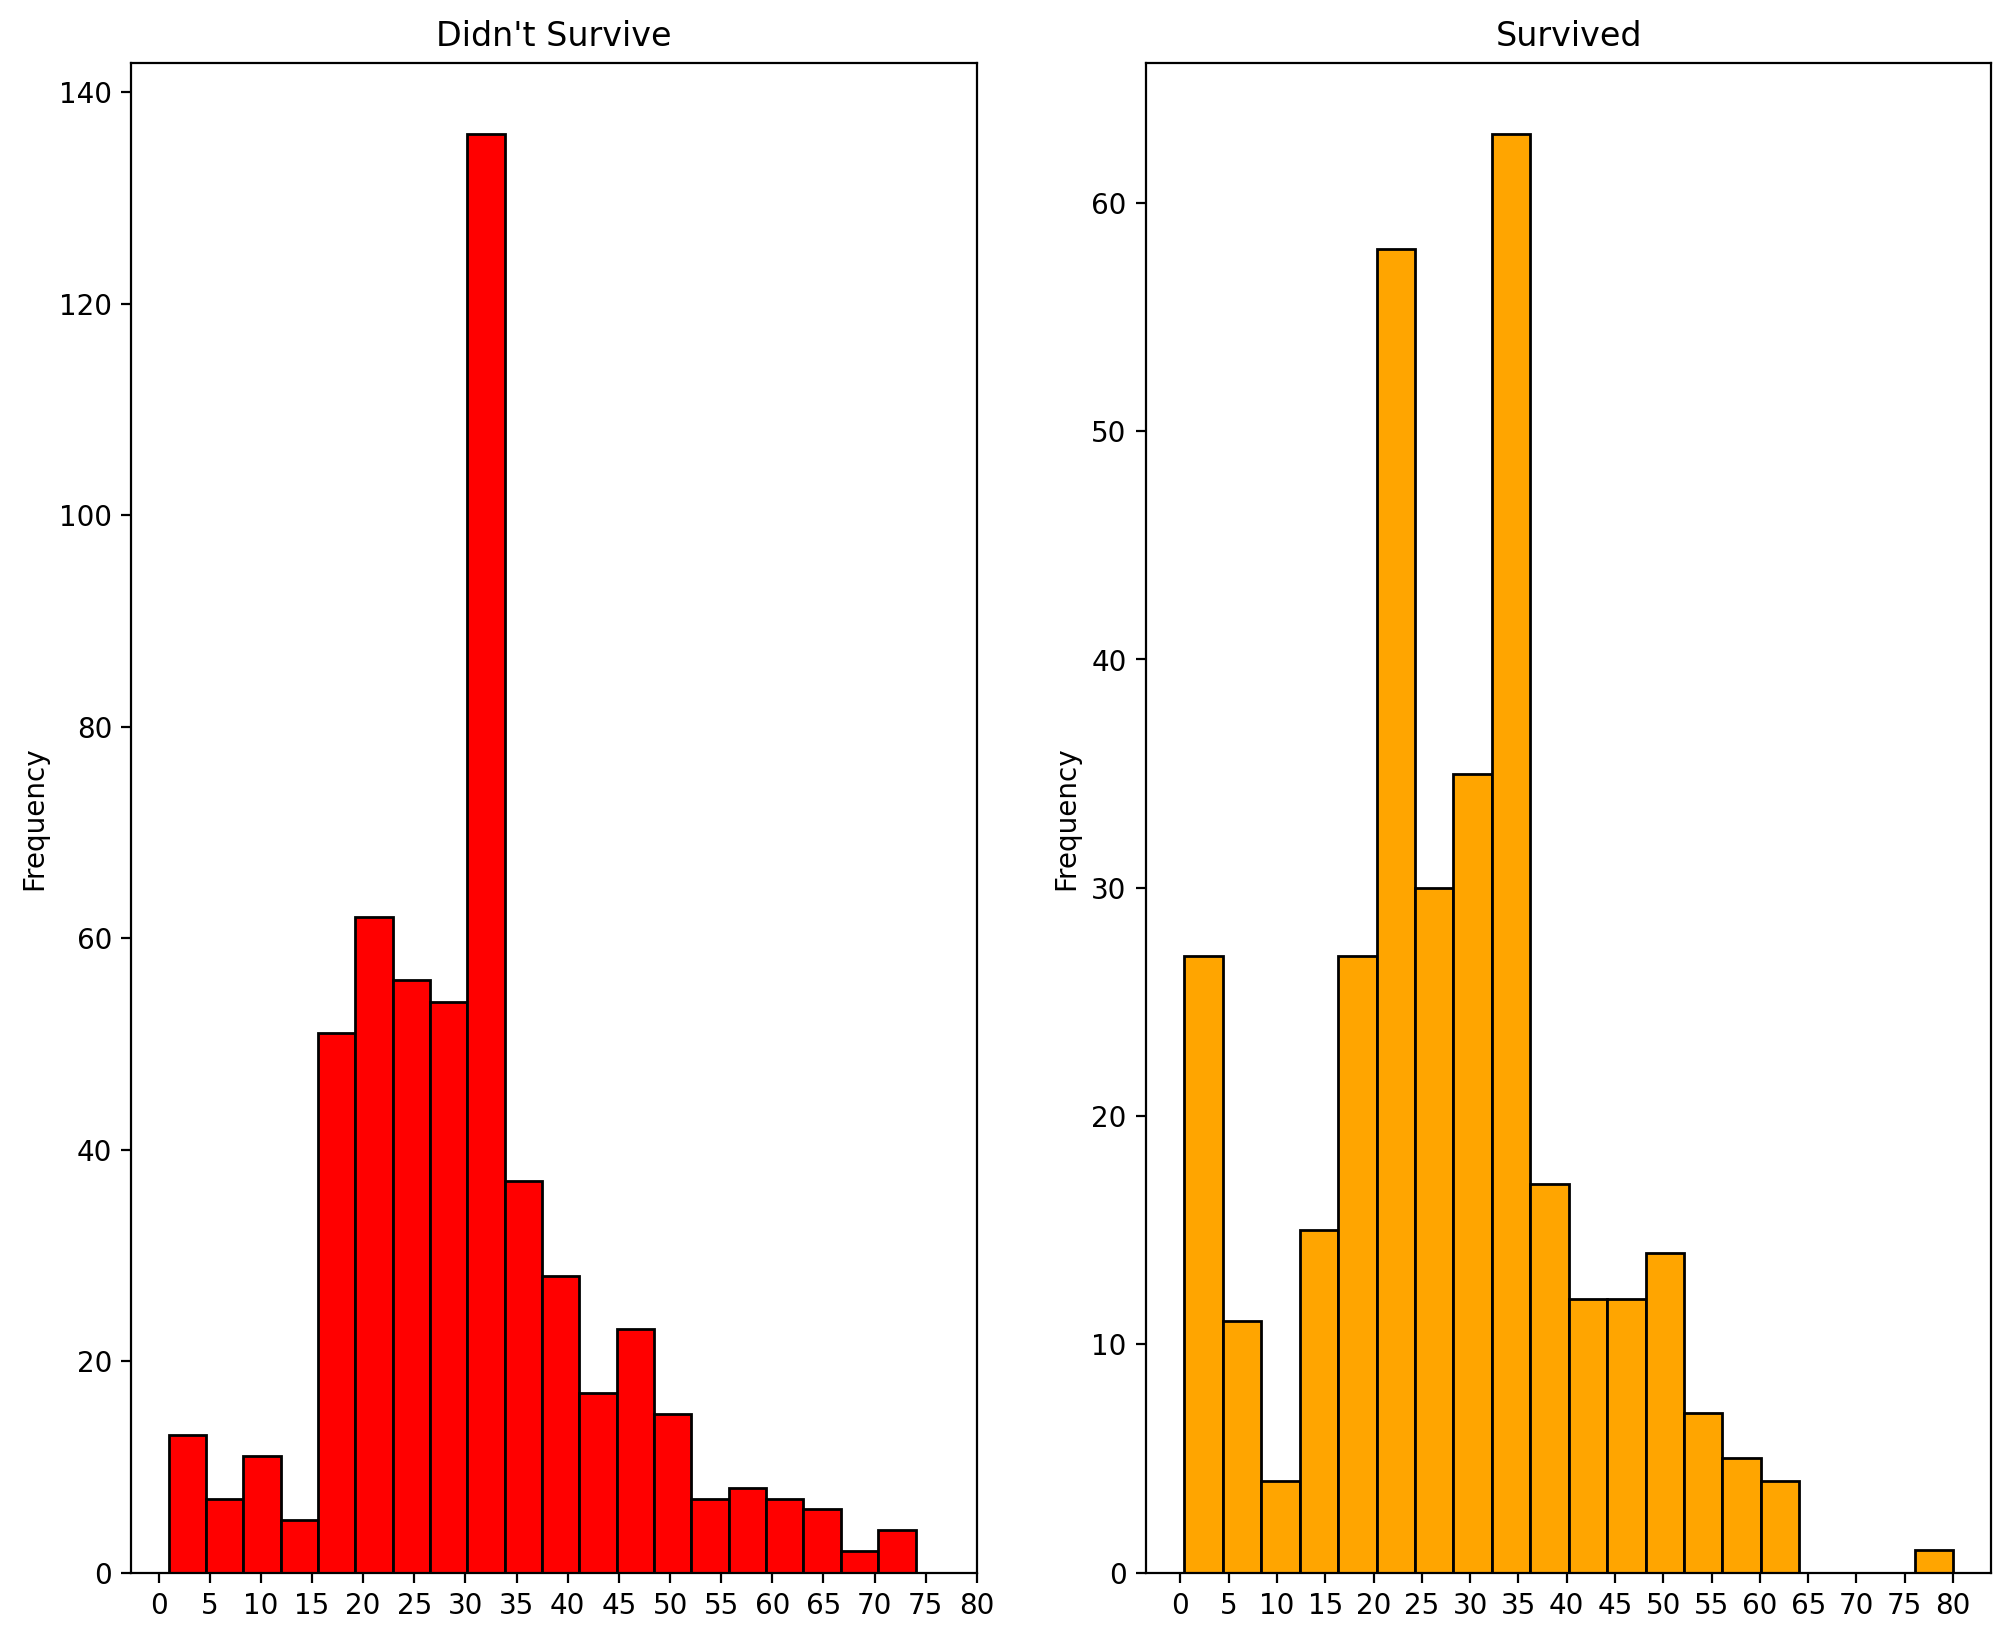

In [271]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,10),dpi=200)
train_set[train_set['Survived']==0].Age.plot.hist(ax=axes[0],bins=20,color='red',edgecolor='black').set_title("Didn't Survive")
axes[0].set_xticks(list(range(0,85,5)))
axes[1].set_xticks(list(range(0,85,5)))
axes[1].set_title('Survived')
train_set[train_set['Survived']==1].Age.plot.hist(ax=axes[1],color='orange',edgecolor='black',bins=20)
plt.show()

__Observations__
<br>

1)The Toddlers meaning the passengers below Age 5 were saved in very large numbers(The women and Children will be given first priority).
<br>

2)The oldest Passenger aged 80 was eventually saved.
<br>

3)Maximum number of deaths were in the age group of 30-40.

## Embarked

Let's explore this categorical value

In [280]:
pd.crosstab([train_set.Embarked,train_set.Pclass],[train_set.Sex,train_set.Survived],margins=True).style.background_gradient(cmap='summer_r')

## Chances of survival by Port of Embarkation

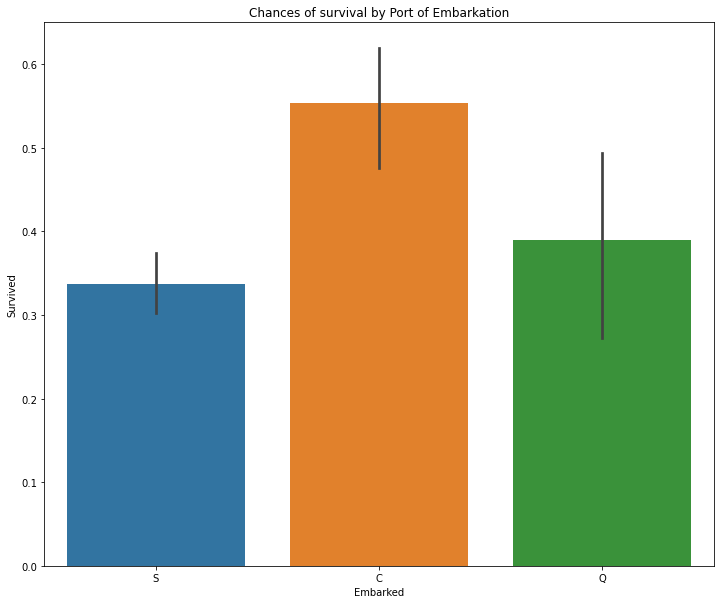

In [284]:
fig=plt.figure(figsize=(12,10))
sns.barplot(data=train_set,x='Embarked',y='Survived').set_title('Chances of survival by Port of Embarkation')
plt.show()

The chances of survival for Port C are the highest arounnd 0.55 while it is the lowest for Port S.

<br>

Let's now see and analyze some features when it comes to the port of embarkation.

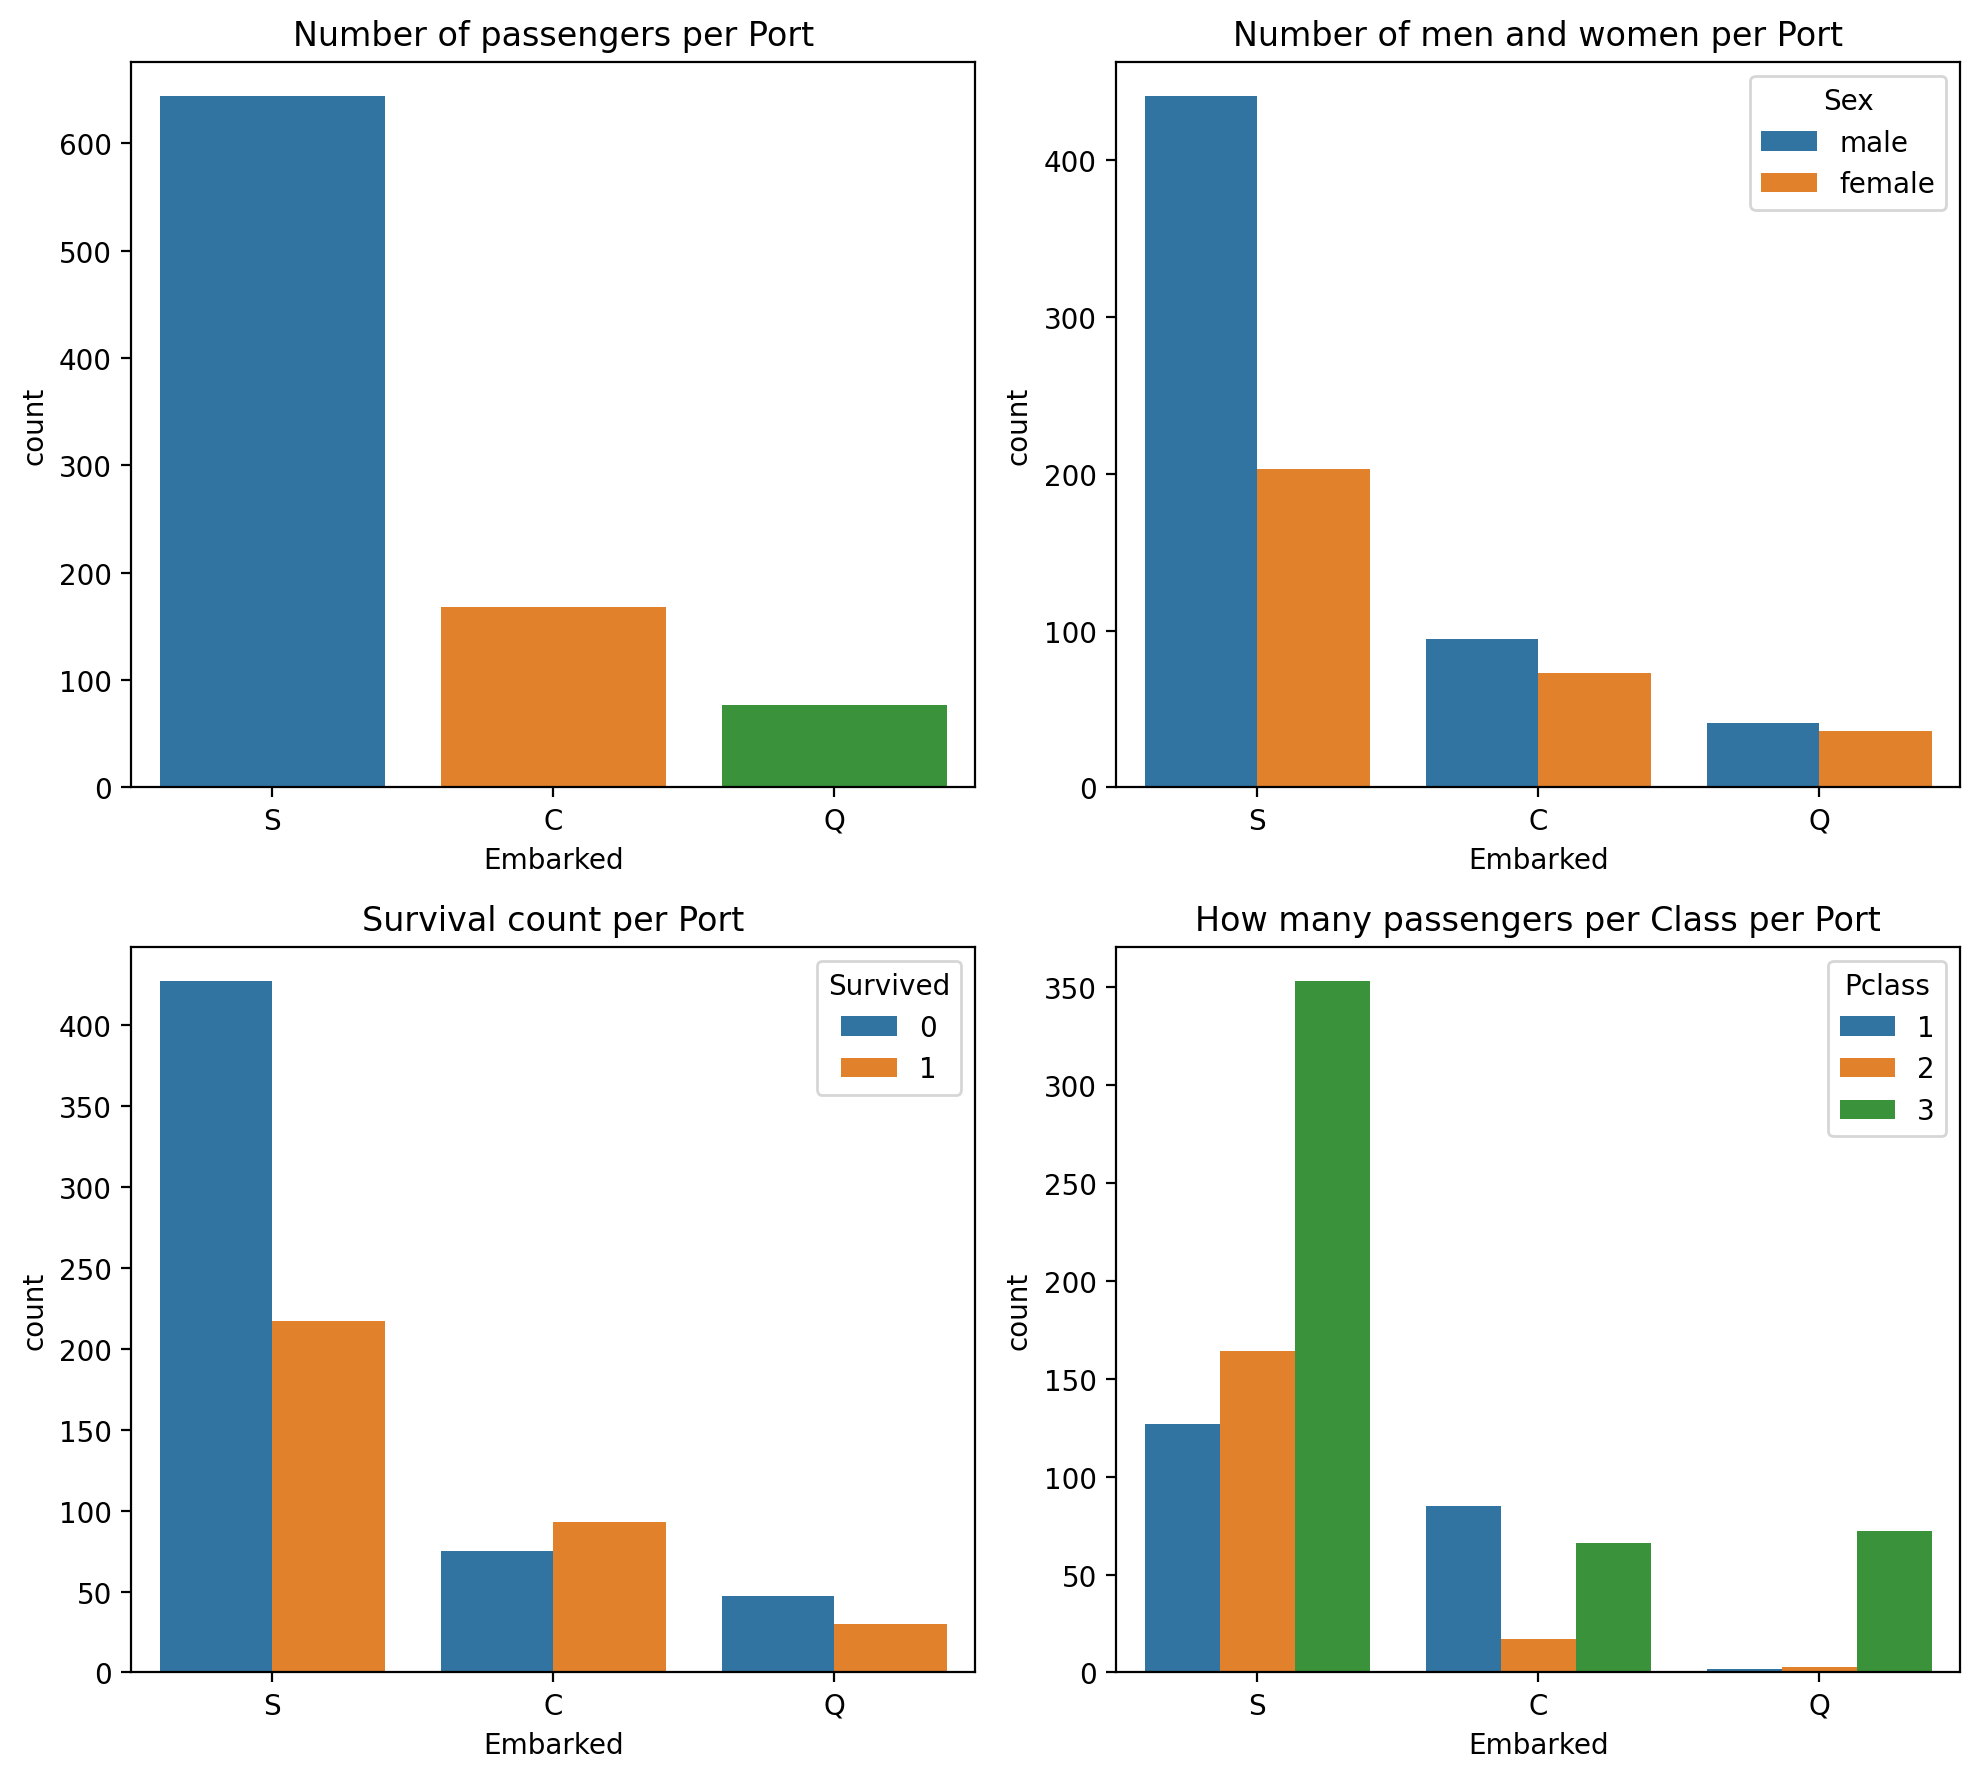

In [296]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,9),dpi=200)

sns.countplot(data=train_set,x='Embarked',ax=axes[0][0]).set_title('Number of passengers per Port')
sns.countplot(data=train_set,x='Embarked',hue='Sex',ax=axes[0][1]).set_title('Number of men and women per Port')
sns.countplot(data=train_set,x='Embarked',hue='Survived',ax=axes[1][0]).set_title('Survival count per Port')
sns.countplot(data=train_set,x='Embarked',hue='Pclass',ax=axes[1][1]).set_title('How many passengers per Class per Port')
plt.tight_layout()
plt.show()

__Observations:__

1)Maximum passengers boarded the Titanic from the port S.Majority of them being from Pclass3.
<br>

2)The passengers from C look to be lucky as a good proportion of them survived.The reason for that might be the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where the majority of the rich people boarded.Still the chances for survival is low here,that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost all passengers that embarked from there in the Plcass3 and we can see that because of that not many passengers survived.

<Figure size 1800x1500 with 0 Axes>

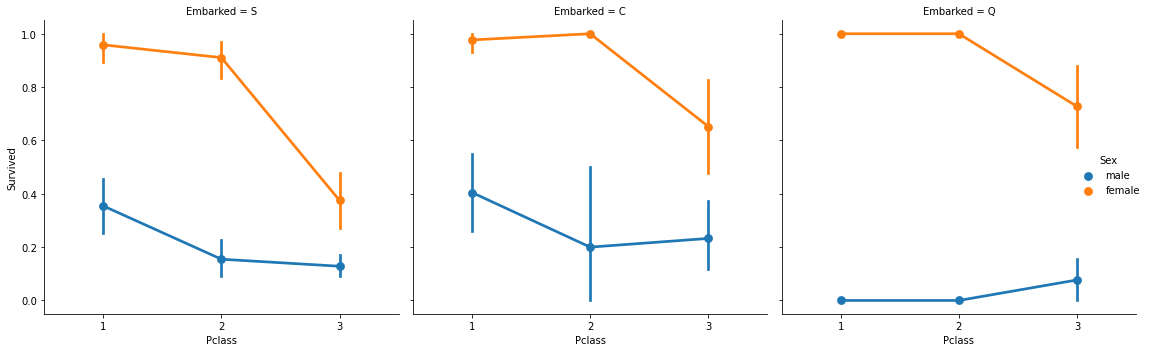

In [320]:
fig=plt.figure(figsize=(12,10),dpi=150)
sns.catplot(data=train_set,x='Pclass',hue='Sex',y='Survived',col='Embarked',kind='point')
plt.tight_layout()
plt.show()

__Observations:__
<br>

1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)

3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

### Filling Embarked NaN
<br>

As we saw that maximum passengers boarded from Ports S,we replace NaN with S.

In [322]:
train_set['Embarked'].fillna('S',inplace=True)

In [327]:
train_set.Embarked.isnull().sum()

#So we don't have any null values in this column.

0

__SibSip-->Discrete Feature(Sibling,Spouse)__

This feature represents whether a person is alone with his family members.
<br>

Sibling=brother,sister,stepbrother,stepsister
<br>

Spouse=Husband,wife

In [332]:
pd.crosstab(train_set.SibSp,train_set.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


__Now let's do a more elaborate visualization of the the above crosstab with data concerning the amount of family someone had in the ship.__

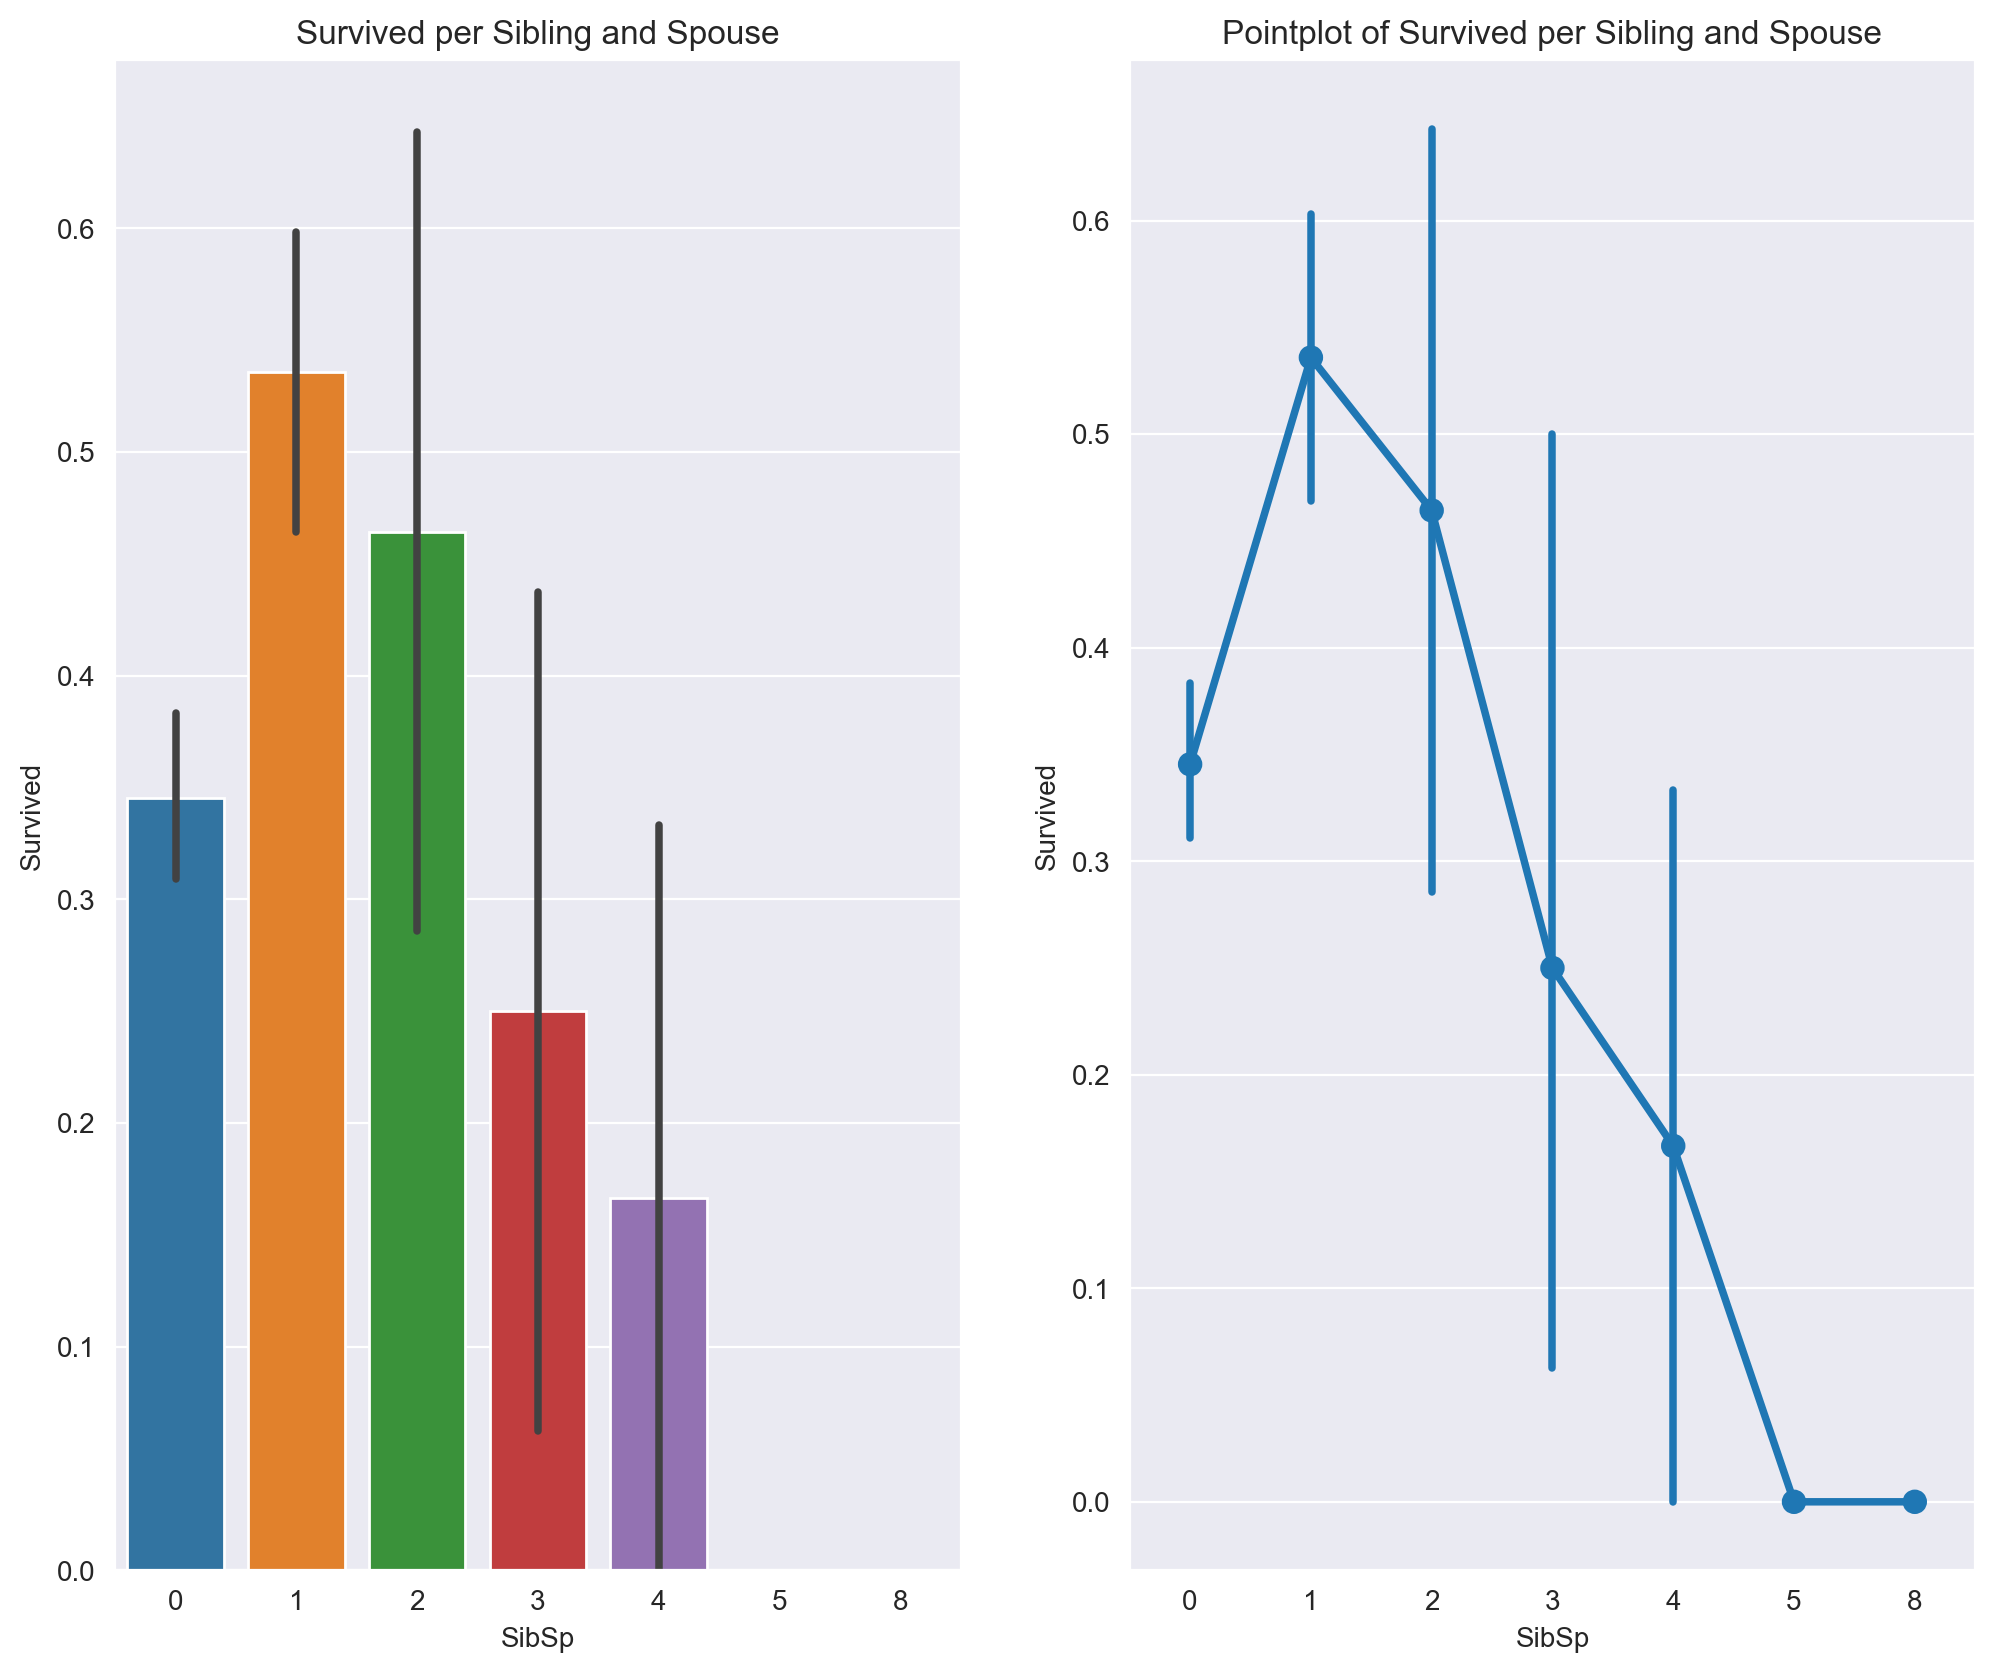

In [350]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,10),dpi=200)
sns.set_style('darkgrid')
sns.barplot(x='SibSp',y='Survived',data=train_set,ax=axes[0]).set_title('Survived per Sibling and Spouse')
sns.pointplot(x='SibSp',y='Survived',kind='point',ax=axes[1],data=train_set,linewidth=10).set_title('Pointplot of Survived per Sibling and Spouse')
plt.show()

In [357]:
pd.crosstab(train_set.SibSp,train_set.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


__Observations__
<br>

The barplot and pointplot above shows that if a passenger is alone on the ship meaninng that SibSp=0 he has a 34.5% chance of survival.The graph roughly decreases if the number of siblings increase.This makes sense.This makes sense because if I have family members onboard I will try to save them first rather that saving myself first,thus I am putting my life at risk and as it seems from the data at a great cost.

<br>

Unfortunately,the data shows that people that had 5-8 family members,their survival rate is 0% meaning that from these families everybody perished in the disaster.May the reason be the Pclass??

<br>

Indeed the reason is Plcass,because from the above crosstab we can see that everybody that had SibSp>3 were all located in the Pclass 3.It is imminent then and stems from the data that a lot of people in Plcass3 died in the accident.

## Parch-->(Parents,Children)

In [361]:
pd.crosstab(train_set.Parch,train_set.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


__Again the crosstab shows that the larger families were located in the third class of the ship.__

Text(0.5, 1.0, 'Pointplot of Survived per family member')

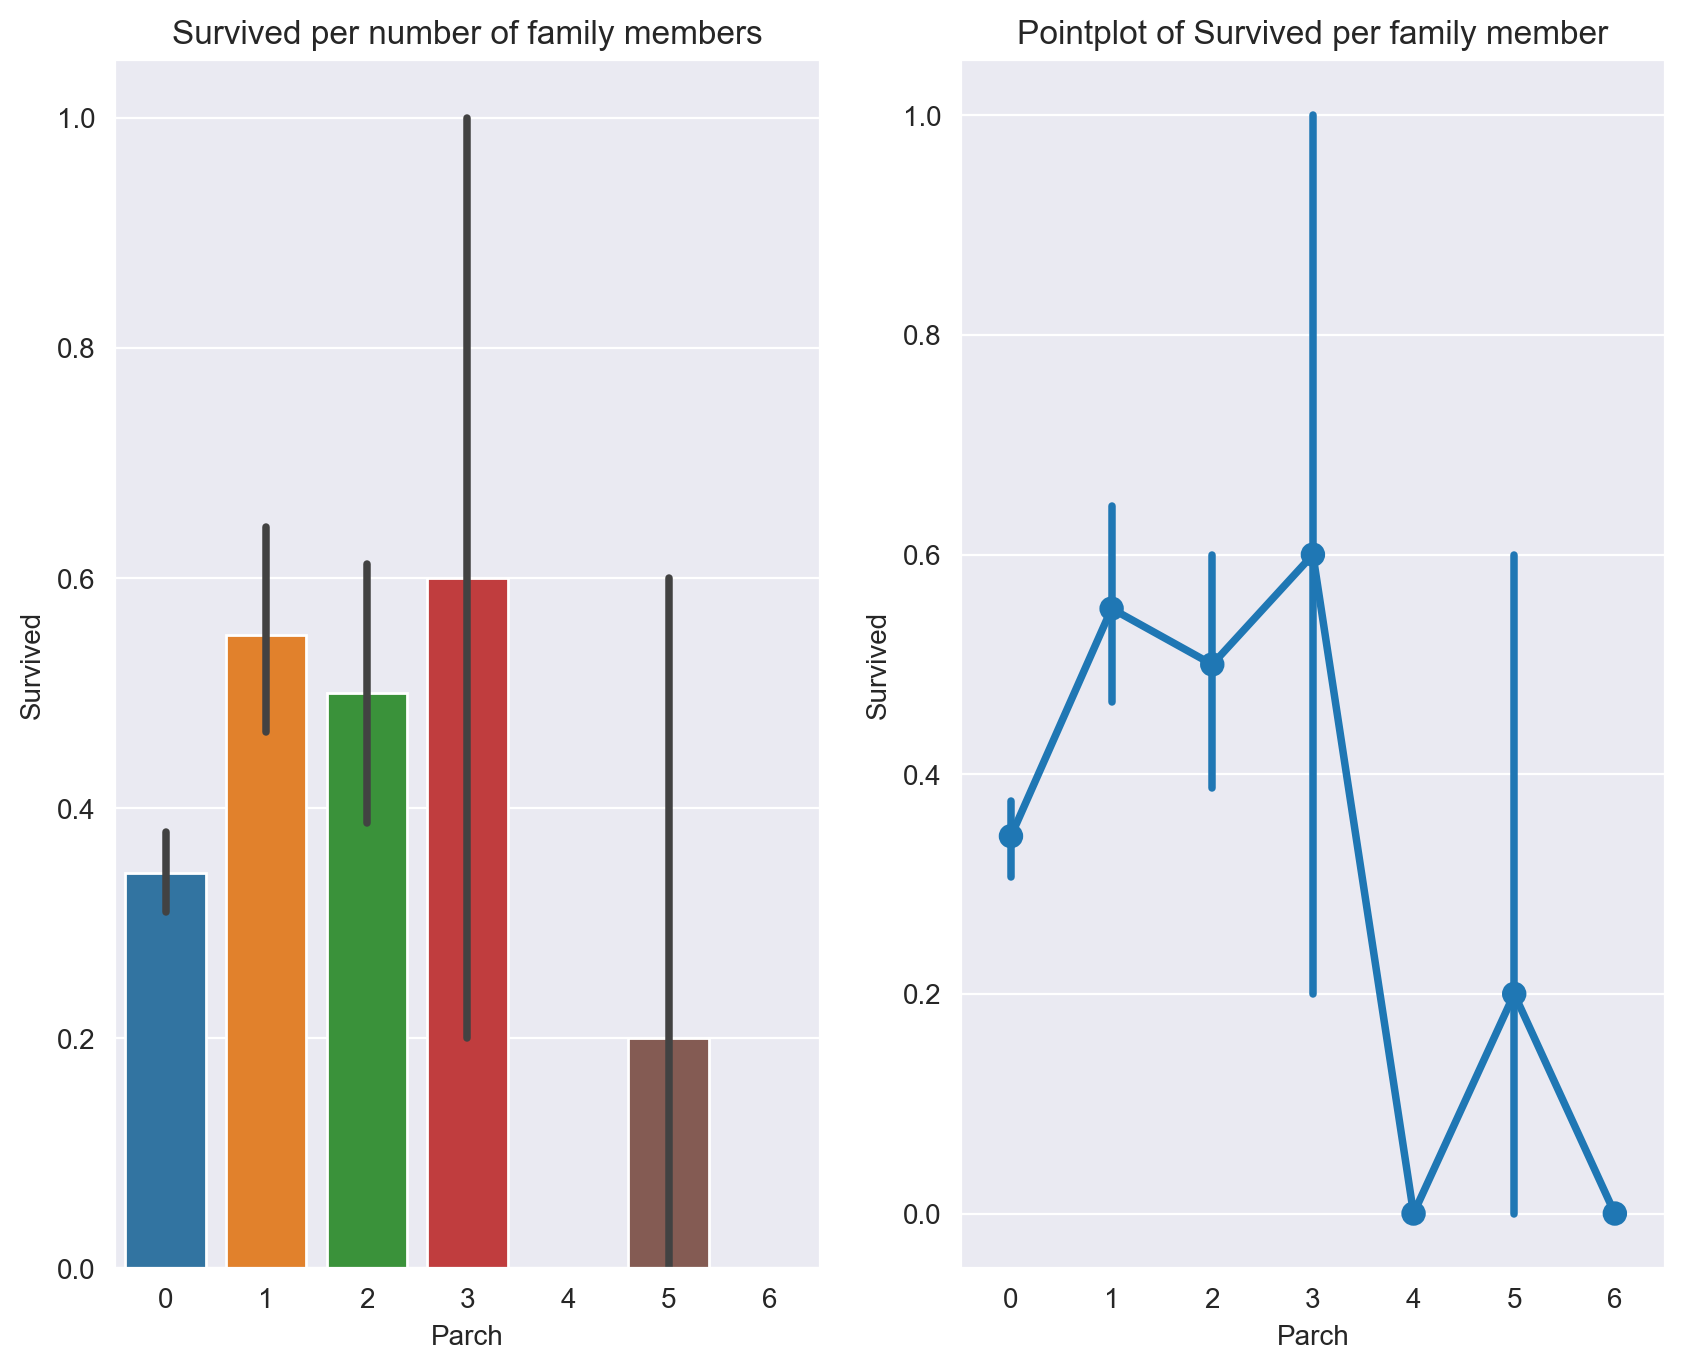

In [369]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=200)
sns.barplot(data=train_set,x='Parch',y='Survived',ax=axes[0]).set_title('Survived per number of family members')
sns.pointplot(data=train_set,x='Parch',y='Survived',ax=axes[1]).set_title('Pointplot of Survived per family member')

__Observations__
<br>

Here too the results are quite similar.Passengers with their parents onboard have a bigger chance of survival but still as the number of parents and children goes up,these chances are getting reduced dramatically.

<br>

The chances of survival are good when someone has 1-3 parents on board.Being alone also proves to be fatal so everyone for himself might seem to not apply to this situation cause we see that the chances of survival of a loner on the ship is quite lower that the ones that actually have 1-3 parents onboard.Again the chances of survival start to decrease dramatically when the number is 4 and bigger.In same cases none of the people that has more than 4 family members made it out alive from the disaster.

### Fare-->Continuous Feature

In [374]:
print('The highest fare paid on the ship is:',round(train_set['Fare'].max(),1),'dollars.')
print('The average fare paid on the ship is:',round(train_set['Fare'].mean(),1),'dolars.')
print('The smallest fare paid on the ship is:',train_set['Fare'].min(),'dollars.')

The highest fare paid on the ship is: 512.3 dollars.
The average fare paid on the ship is: 32.2 dolars.
The smallest fare paid on the ship is: 0.0 dollars.


__Observations__
<br>

We see that the lowest fare paid was 0.0$.So what does this tells us??Of course the company did not offer free ticket to so many people so we are guessing that many people boarded the ship illegaly and found a way to maybe sneak in.


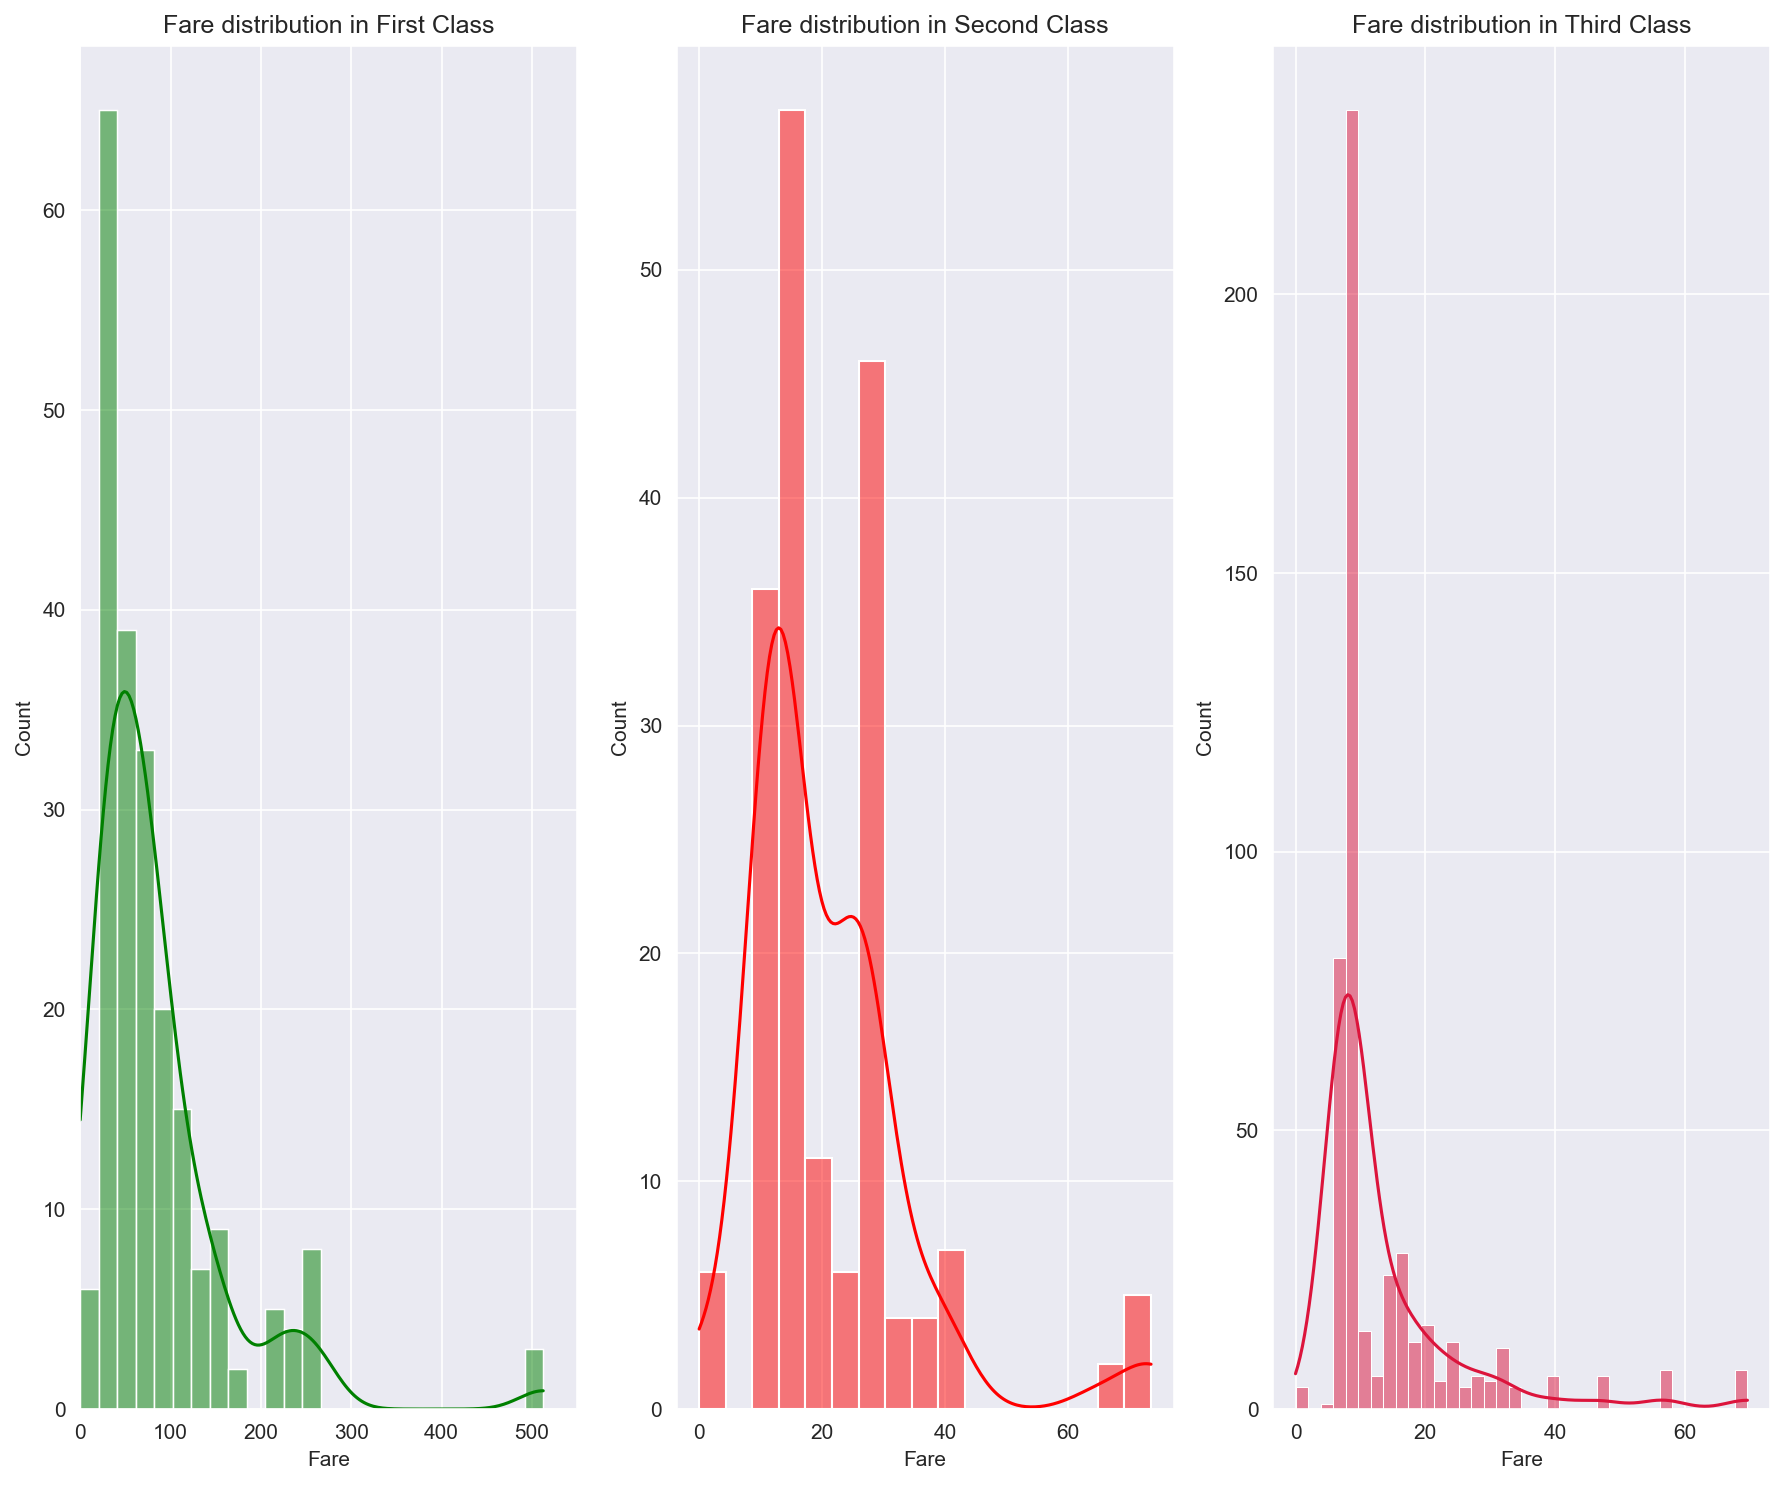

In [409]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,10),dpi=150)
sns.histplot(train_set[train_set['Pclass']==1].Fare,ax=axes[0],color='green',kde=True).set_title('Fare distribution in First Class')
axes[0].set_xlim(0,550)
sns.histplot(train_set[train_set['Pclass']==2].Fare,ax=axes[1],color='red',kde=True).set_title('Fare distribution in Second Class')
sns.histplot(train_set[train_set['Pclass']==3].Fare,ax=axes[2],color='crimson',kde=True).set_title('Fare distribution in Third Class')
plt.tight_layout()
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the class gets worse and the standards decrease.Of course the fares for the 1st class are way bigger  that in the other two classes averaging 3-5 times the average fare cost of the other two classes.

## Observations in a Nutshell for all features:
<br>

__Sex__:The chance of survival for women is very high as compared to that of men.

<br>

__Pclass__:There is a visible trend that being a 1st class passenger give yuou better chances of survival.The survival rate for Plcass 3 is very low .For women ,the chance of survival from Pclass1 is close to 100% and still really high for the women on the Pclass2.So money and status play a crucial role to whether someone will be saved or not.
<br>

__Age__:Children less than 5-10 years of Age do have a high chance of survival.Passengers between age group of 15 and 35 suffered heave losses on this disaster.
<br>

__Embarked__:This is a very intersting feature.The chances of survival at C looks to be better than even though the majority of Plcass1 passengers got up on the ship at port S.Passengers at Q were all from Pclass3.
<br>

__Parch+SibSp__: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.


## Correlation between the Features

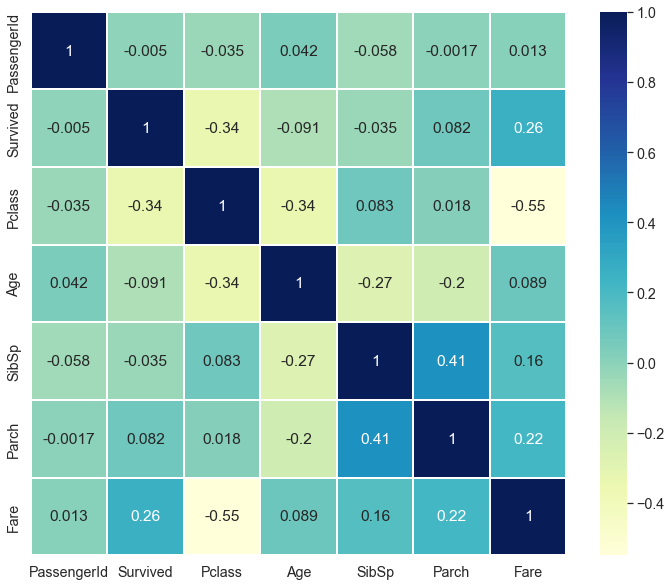

In [449]:
plt.figure(figsize=(12,10))
sns.heatmap(data=train_set.corr(),annot=True,linewidths=0.4,cmap="YlGnBu")
sns.set(font_scale=1.3)
plt.show()

__Interpreting The Heatmap__
<br>
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

__CORRELATION__: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

__NEGATIVE CORRELATION__: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as __MultiColinearity__ as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.
<br>
<br>
<br>

# Part 2:Future Engineering and data cleaning
<br>

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.
<br>

<br>

## Age_band

__Problem with the Age feature of our dataset__:
br>

As we have mentioned earlier that Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

Eg:If we say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if we say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. We will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [454]:
#Let's first create another column in our dataframe which we are gonna call 'Age_band'
train_set['Age_band']=0
train_set.loc[train_set['Age']<=16,'Age_band']=0
train_set.loc[(train_set['Age']>16)&(train_set['Age']<=32),'Age_band']=1
train_set.loc[(train_set['Age']>32)&(train_set['Age']<=48),'Age_band']=2
train_set.loc[(train_set['Age']>48)&(train_set['Age']<=64),'Age_band']=3
train_set.loc[train_set['Age']>64,'Age_band']=4
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [457]:
#Let's now see the new feature in a dataframe
train_set['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


<Figure size 1080x720 with 0 Axes>

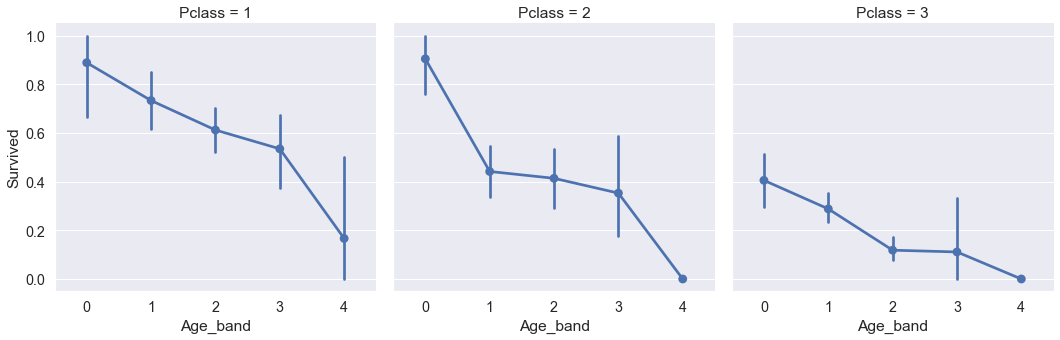

In [480]:
plt.figure(figsize=(15,10))
sns.catplot(x='Age_band',y='Survived',data=train_set,col='Pclass',kind='point',lw=3)
plt.show()

__So the data is very true,cause the survival rate drops down as the age_band goes up irrespective of the calss that we are in in the ship.__

## Family Size and alone.

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [492]:
#Now let's create another column for our dataset and make name it Family_Size.

train_set['Family_size']=0
train_set['Family_size']=train_set['Parch']+train_set['SibSp'] #Just ass the numbers

#Now let's create anther colums that we are going to name Alone
train_set['Alone']=0
train_set.loc[train_set.Family_size==0,'Alone']=1

#Let's now see the new dataframe that we created(the new two columns)
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


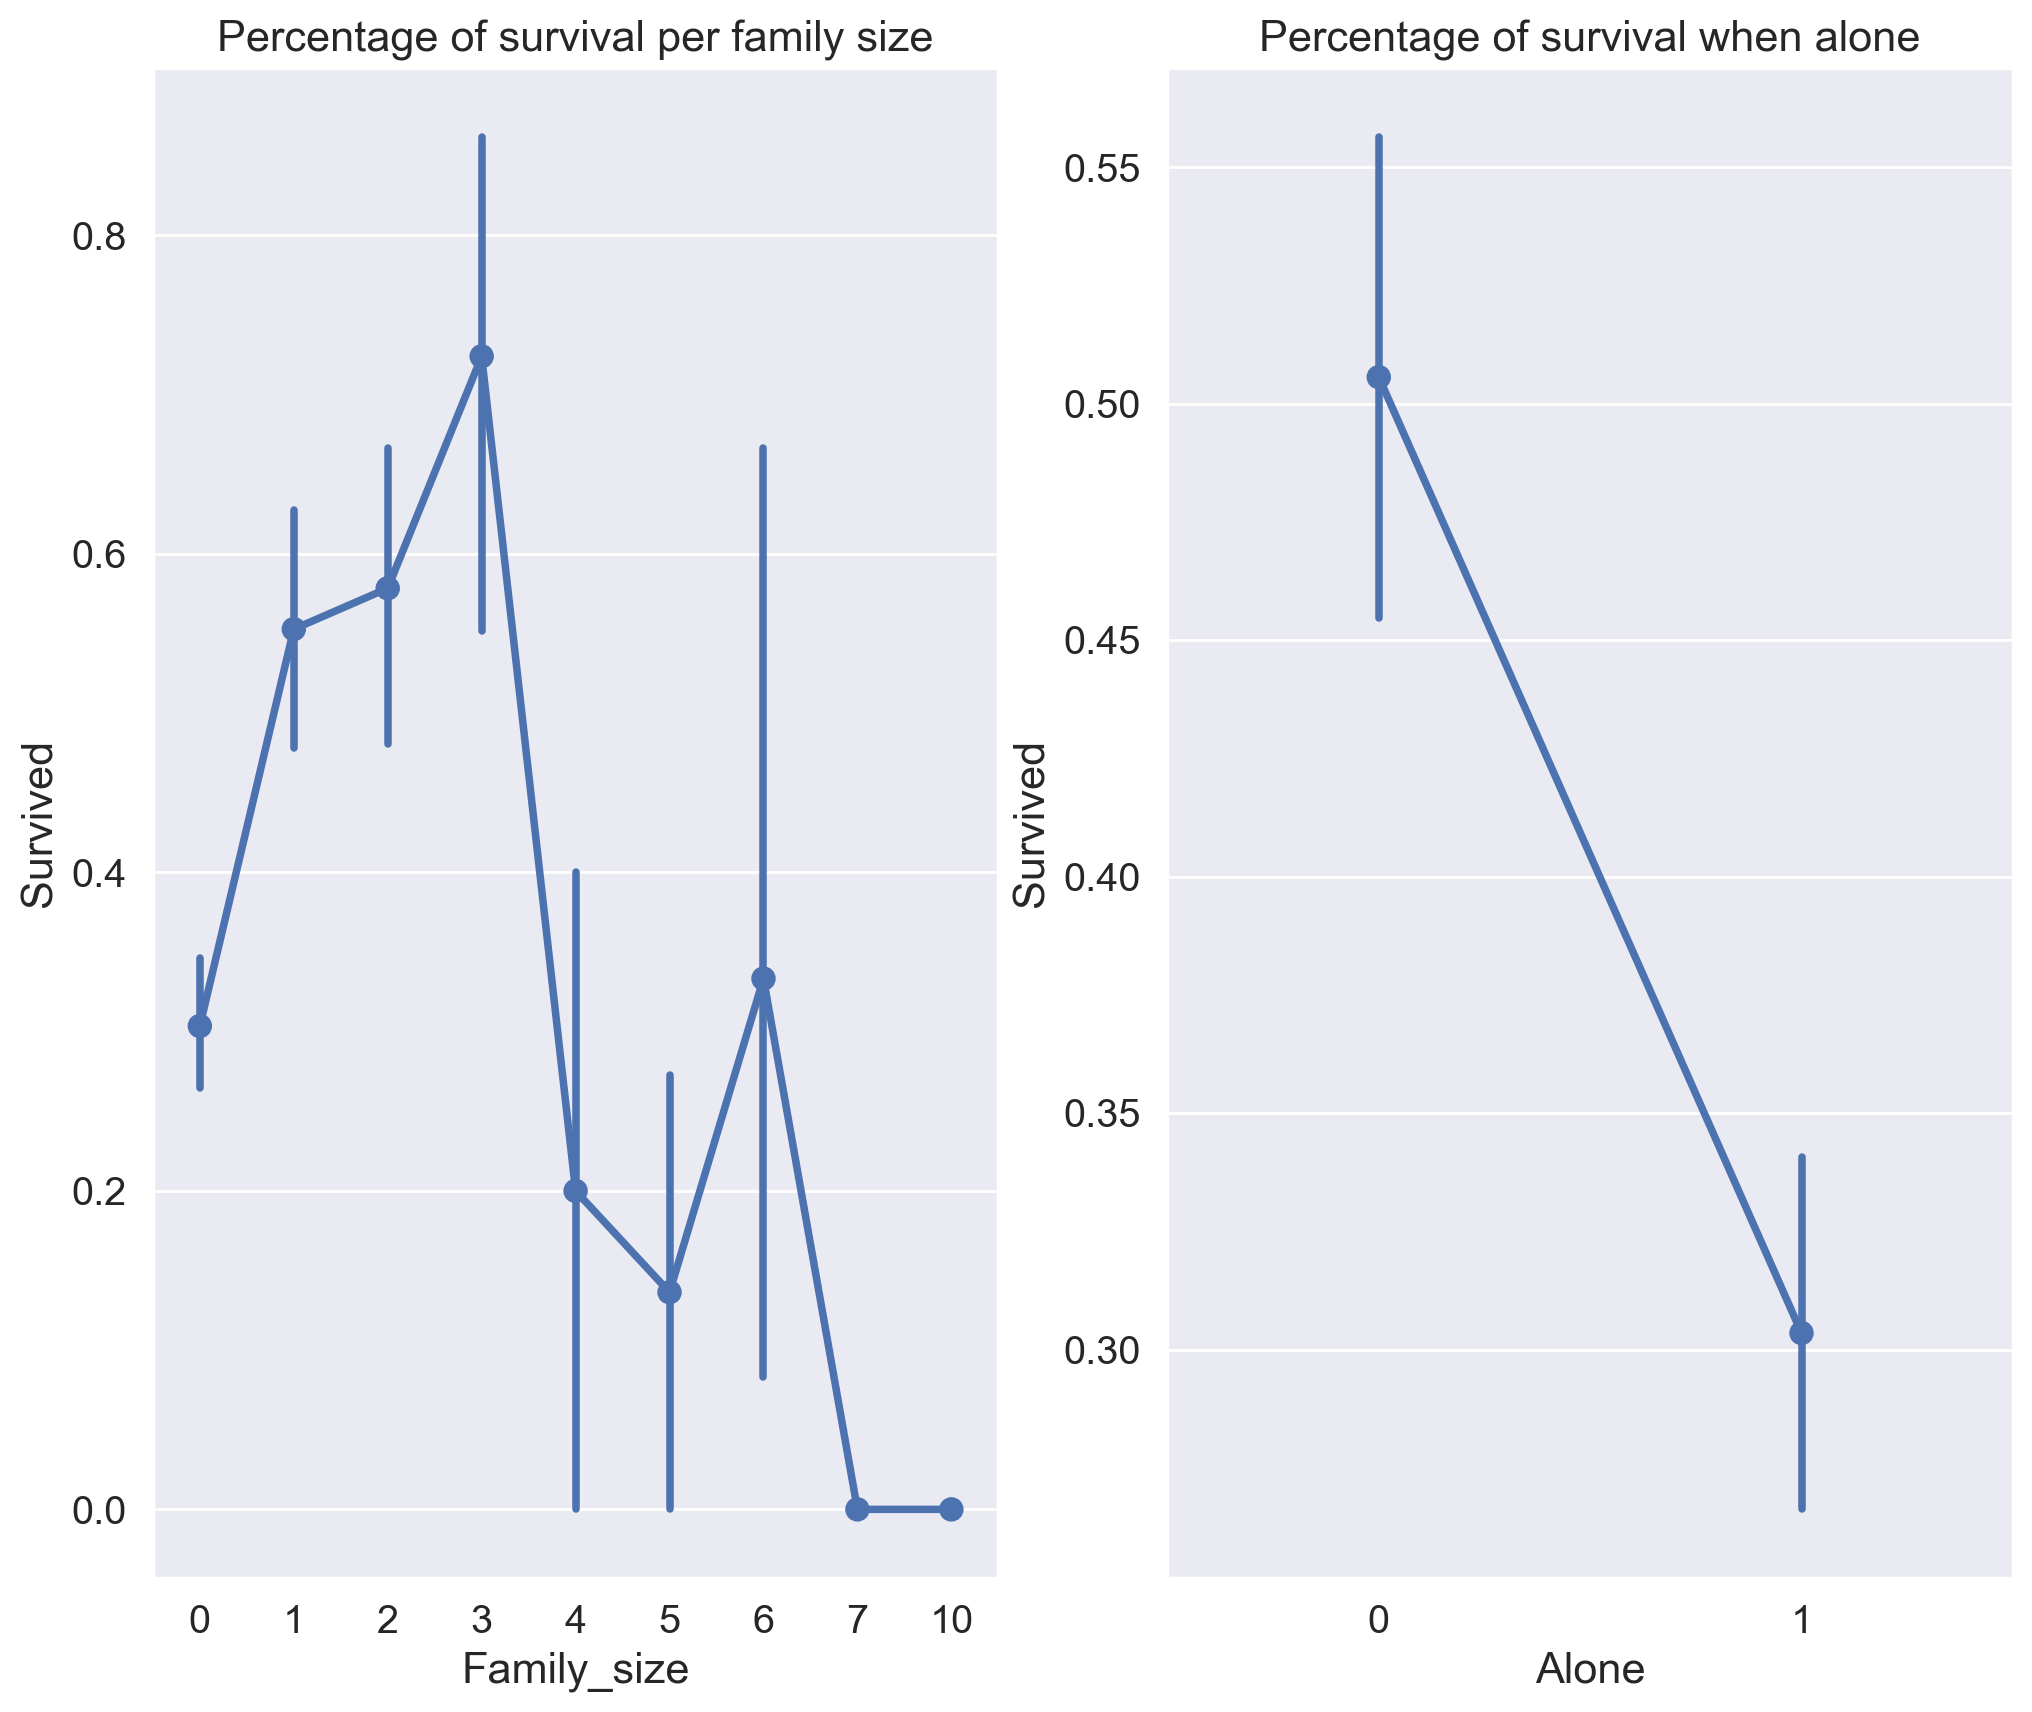

<Figure size 432x288 with 0 Axes>

In [502]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,10),dpi=200)
sns.pointplot(data=train_set,x='Family_size',y='Survived',ax=axes[0]).set_title('Percentage of survival per family size')
sns.pointplot(data=train_set,x='Alone',y='Survived',ax=axes[1]).set_title('Percentage of survival when alone')
plt.show()
plt.tight_layout()

__Family_Size=0 means that the passeneger is alone__. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

<Figure size 864x720 with 0 Axes>

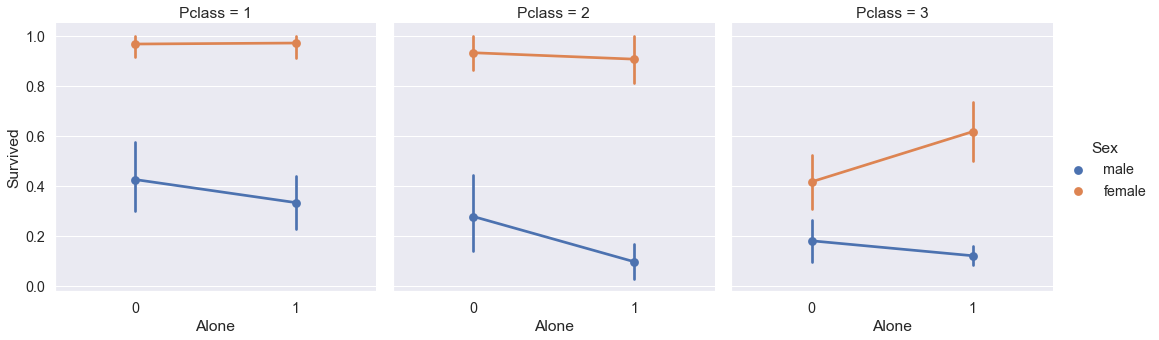

In [506]:
plt.figure(figsize=(12,10))
sns.catplot(data=train_set,x='Alone',y='Survived',col='Pclass',kind='point',hue='Sex')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

## Fare_Range

<br>
Since fare is also a continuous value,we need to convert it into an ordinal value.For this we will use pandas.qcut

So what this function of Pandas does is it splits a value(in our case the continuous value of Fare),into how many bins we have passed and will automatically arrange the values equally spaced into those bins or value ranges.


In [512]:
train_set['Fare_range']=pd.qcut(train_set['Fare'],4)

train_set.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the fare_range increases, __the chances of survival increases__.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [520]:
train_set['Fare_cat']=0
train_set.loc[train_set['Fare']<=7.91,'Fare_cat']=0
train_set.loc[(train_set['Fare']>7.91)&(train_set['Fare']<=14.454),'Fare_cat']=1
train_set.loc[(train_set['Fare']>14.454)&(train_set['Fare']<=31),'Fare_cat']=2
train_set.loc[(train_set['Fare']>31)&(train_set['Fare']<=513),'Fare_cat']=3

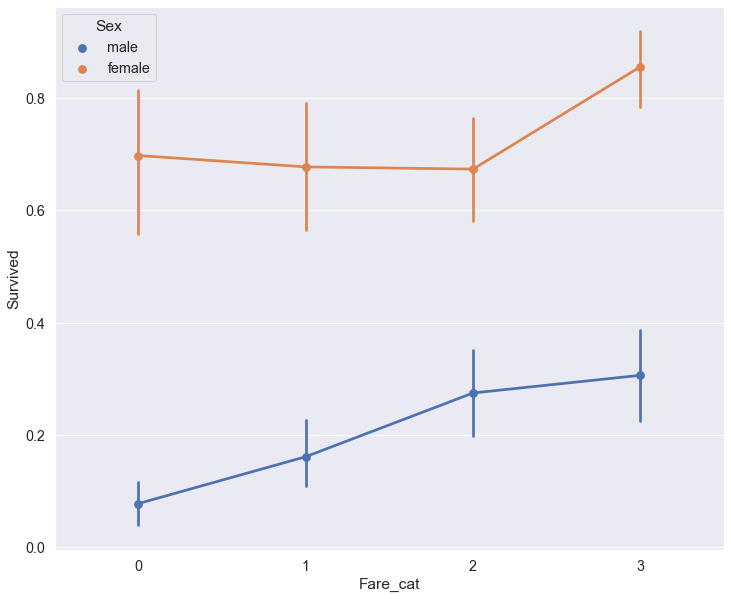

In [522]:
plt.figure(figsize=(12,10))
sns.pointplot(data=train_set,x='Fare_cat',y='Survived',hue='Sex')
plt.show()

Again we see that the chances for survival for men are quite meak,but what is evident thorugh looking at this graph,whether you were a man or a woman aboard,if you have spent enought money on your ticket,then your chances of survival increase dramatically.

### Converting String Values into Numerical

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [523]:
train_set['Sex'].replace(['male','female'],[0,1],inplace=True)
train_set['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_set['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## Dropping UnNeeded Features
__Name__--> We don't need name feature as it cannot be converted into any categorical value.

__Age__--> We have the Age_band feature, so no need of this.

__Ticket__--> It is any random string that cannot be categorised.

__Fare__--> We have the Fare_cat feature, so unneeded

__Cabin__--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

__Fare_Range__--> We have the fare_cat feature.

__PassengerId__--> Cannot be categorised.

<AxesSubplot:>

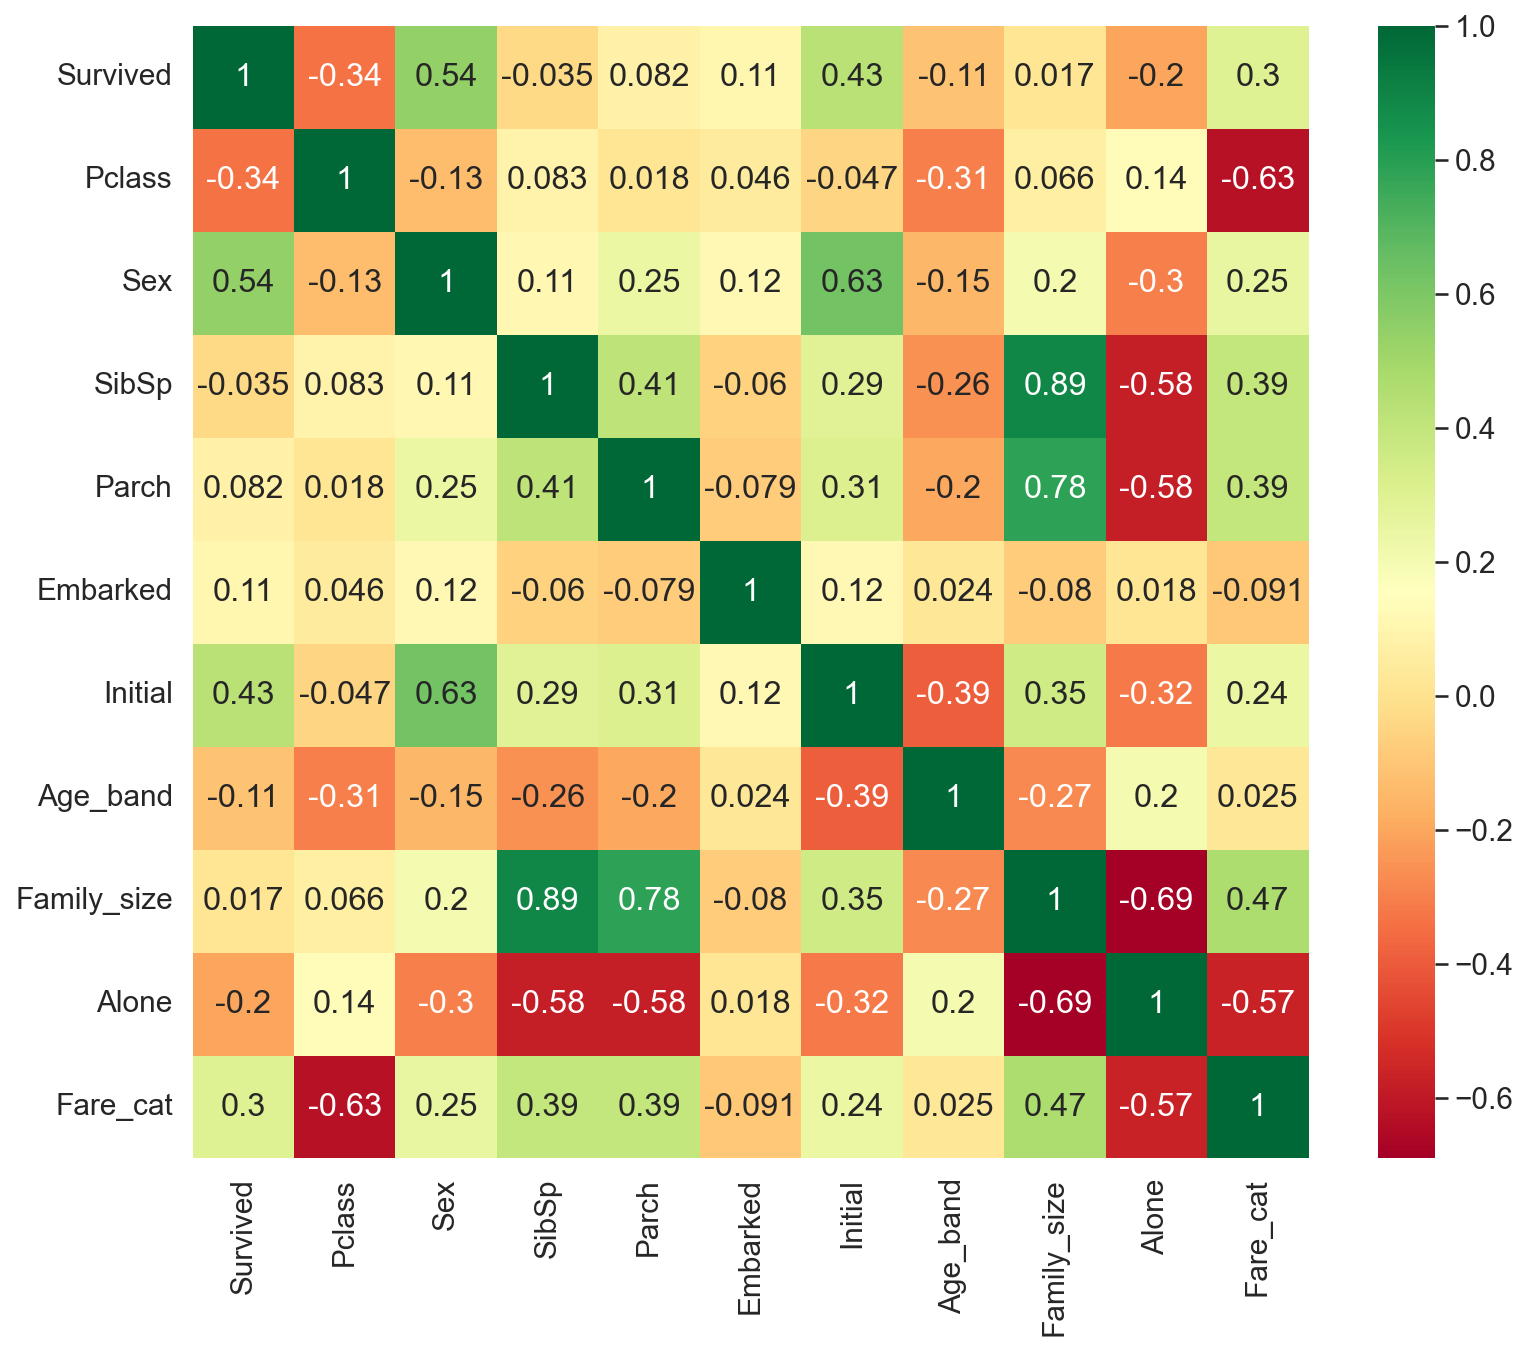

In [534]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_range','PassengerId'],axis=1,inplace=True)
plt.figure(figsize=(12,10),dpi=150)
sns.heatmap(data=train_set.corr(),annot=True,cmap='RdYlGn')


Now the above correlation plot, we can see some positively related features. Some of them being SibSp andd Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.


# Part 3:Predictive Modeling
<br>

We have gained some insights from the EDA part.But with that ,we cannot accurately predict or tell whether a passenger will  survive the disaster or die.So no we will predict whether Passenger wil survive or not using some Machine Learnign Algorithms.Following are the algorithms we will use to make the model.

<br>
1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

In [535]:
#Importing all the machine learning packages we are going to use
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [536]:
train,test=train_test_split(train_set,test_size=0.3,random_state=0,stratify=train_set['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train_set[train_set.columns[1:]]
Y=train_set['Survived']

__Radial Support Vector Machines(rbf-SVM)__


In [542]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y.values.ravel())
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


__Logistic Regression__


In [541]:
model = LogisticRegression()
model.fit(train_X,train_Y.values.ravel())
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


__Decision Tree__


In [543]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y.values.ravel())
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


__K-Nearest Neighbours(KNN)__

In [546]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y.values.ravel())
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Lets check the accuracies over various values of n_neighbours.

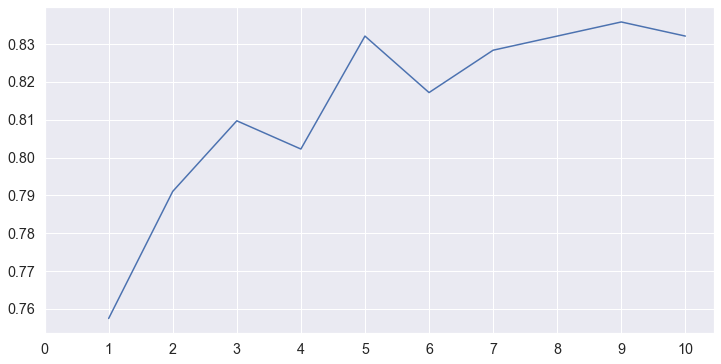

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [554]:
a=pd.Series(dtype='float64')
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y.values.ravel())
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

__Gaussian Naive Bayes__


In [556]:
model=GaussianNB()
model.fit(train_X,train_Y.values.ravel())
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


__Random Forests__

In [557]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y.values.ravel())
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is __No__, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as __model variance__.

To overcome this and get a generalized model,we use __Cross Validation__.

## Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [559]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.810350,0.026602
Naive Bayes,0.801386,0.028999
Random Forest,0.808102,0.034838


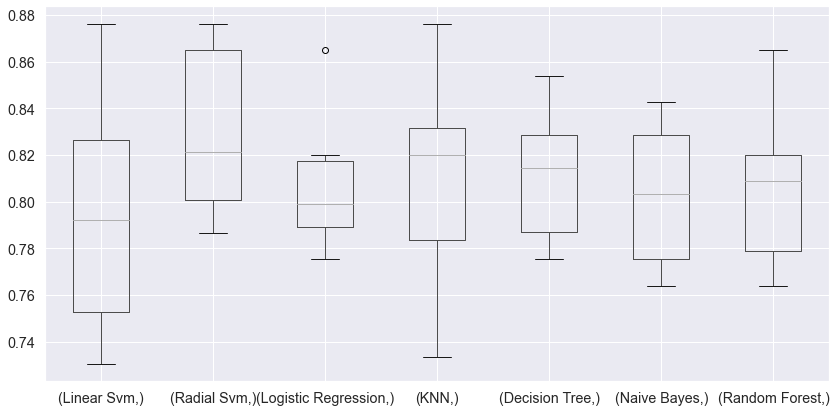

In [562]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.tight_layout()
plt.show()

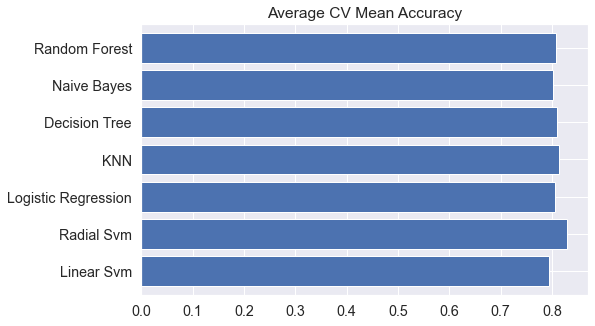

In [563]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

## Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

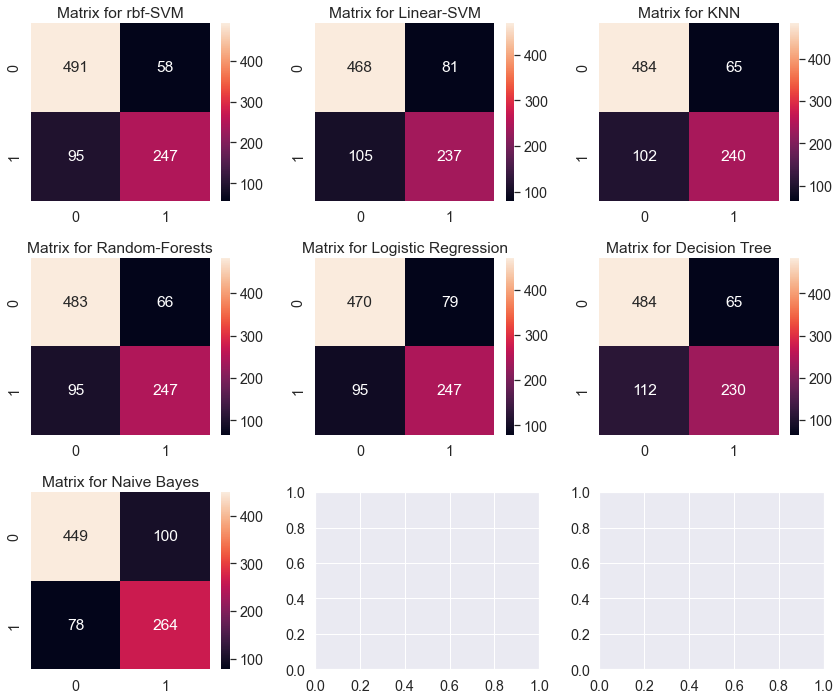

In [565]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()
plt.show()

__Interpreting Confusion Matrix__
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are __491(for dead) + 247(for survived)__ with the mean CV accuracy being __(491+247)/891 = 82.8%__ which we did get earlier.

2)__Errors__--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

## Hyper-Parameters Tuning

Hyper-Parameters Tuning
The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

__SVM__

In [566]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


__Random Forests__

In [567]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for Rbf-Svm is 82.82% with C=0.05 and gamma=0.1. For RandomForest, score is abt 81.8% with n_estimators=900.

## Ensembling
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## __Voting Classifier__
<br>
It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [569]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y.values.ravel())
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


## __Bagging__

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

__Bagged KNN__
<br>

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [571]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y.values.ravel())
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


__Bagged  Decision Tree__

In [572]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y.values.ravel())
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


__Boosting__
<br>

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

__AdaBoost(Adaptive Boosting)__
<br>
The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [573]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


__Stochastic Gradient Boosting__
<br>
Here too the weak learner is a Decision Tree.

In [575]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

__Hyper-Parameter Tuning for AdaBoost__

In [576]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


The maximum accuracy we can get with AdaBoost is __83.16% with n_estimators=200 and learning_rate=0.05__

__Confusion Matrix for the Best Model__

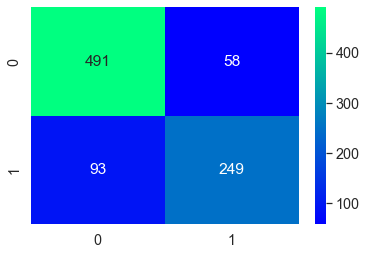

In [577]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## __Feature Importance__


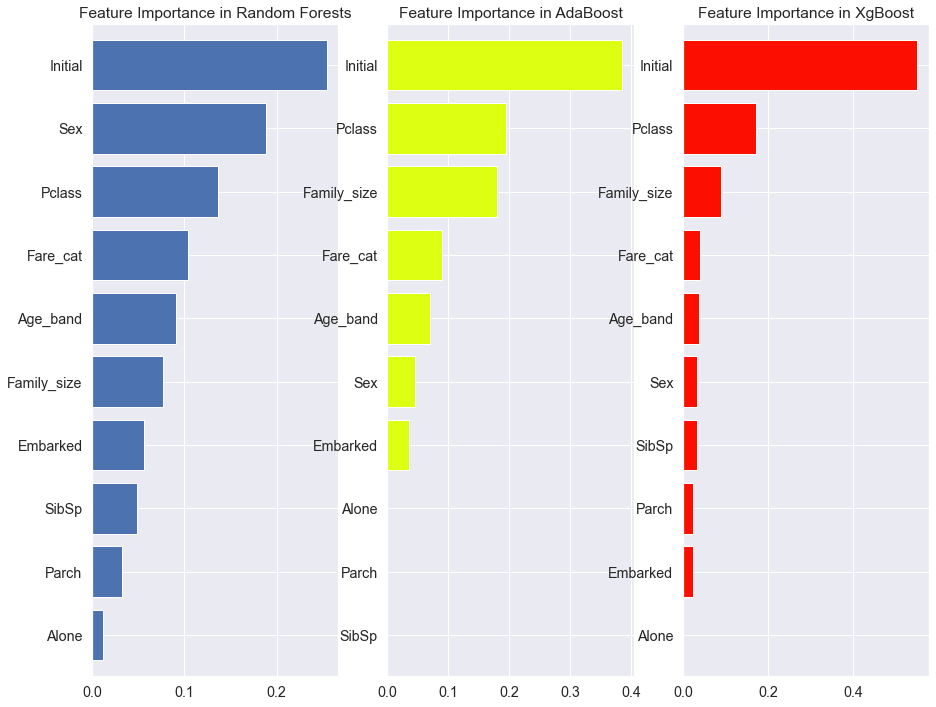

In [588]:
f,ax=plt.subplots(1,3,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0])
ax[0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1],color='#ddff11')
ax[1].set_title('Feature Importance in AdaBoost')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[2],color='#FD0F00')
ax[2].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

__Observations__:
<br>
1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.